<a href="https://colab.research.google.com/github/Mohitkhatri1902/ML_Unsupervised/blob/main/Mohit_Unsupervised_ML_Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Analyzing the Indian Restaurant Industry with Zomato Data




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
 **Member  -** Mohit Khatri




# **Project Summary -**

The project revolves around analyzing the Indian restaurant industry using data sourced from Zomato, a prominent restaurant aggregator and food delivery platform. By leveraging two key datasets – Zomato restaurant metadata and restaurant reviews – the project aims to gain insights into customer sentiments, segment restaurants into meaningful categories, and provide actionable recommendations for both consumers and Zomato.

The analysis begins with exploratory data analysis (EDA) to understand the characteristics of the datasets and identify potential trends and patterns. Subsequently, clustering techniques will be applied to segment restaurants based on various attributes such as cuisine types, pricing, and customer ratings. This segmentation will enable the identification of distinct restaurant clusters, allowing consumers to make informed choices based on their preferences.

Additionally, sentiment analysis will be performed on the restaurant reviews dataset to gauge customer satisfaction levels and identify areas for improvement. By examining the sentiments expressed in reviews, Zomato can gain valuable insights into customer preferences and concerns, enabling them to enhance their services and offerings.

Overall, the project aims to provide valuable insights into the Indian restaurant industry, empower consumers to make informed dining decisions, and support Zomato in improving its platform and services based on customer feedback. Through the combination of data analysis techniques and domain knowledge, the project seeks to contribute to the growth and development of the restaurant industry in India.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The aim of this capstone project is to conduct a comprehensive analysis of the Indian restaurant industry leveraging data obtained from Zomato, a prominent restaurant aggregator and food delivery platform. The project seeks to uncover valuable insights into customer sentiments, segment Zomato restaurants into distinct categories, and derive actionable conclusions to benefit both consumers and the company.

**Objectives:**
1. Gain insights into customer sentiments by analyzing Zomato restaurant reviews.
2. Cluster Zomato restaurants based on various factors such as cuisine, cost, and customer ratings.
3. Provide recommendations to customers for finding the best restaurants in their locality.
4. Assist Zomato in identifying opportunities for growth and improvement within the industry.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
meta_df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Project/Unsupervised ML/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Project/Unsupervised ML/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Total observation and feature for restaurant: {meta_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


### Dataset Information

In [7]:
# Dataset Info
print('Restaurant Info')
print('\n')
meta_df.info()
print('='*120)
print('\n')
print('Review Info')
print('\n')
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print("Duplicate Values in Restaurant names and Metadata observations dataset : ",meta_df.duplicated().sum())
print("Duplicate Values in Restaurant reviews dataset : ",review_df.duplicated().sum())

Duplicate Values in Restaurant names and Metadata observations dataset :  0
Duplicate Values in Restaurant reviews dataset :  36


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print("Missing Values Info of Restaurant")
print('\n')
meta_df.isnull().sum()

Missing Values Info of Restaurant




Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [10]:
print("Missing Values Info of Review")
print('\n')
review_df.isnull().sum()

Missing Values Info of Review




Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

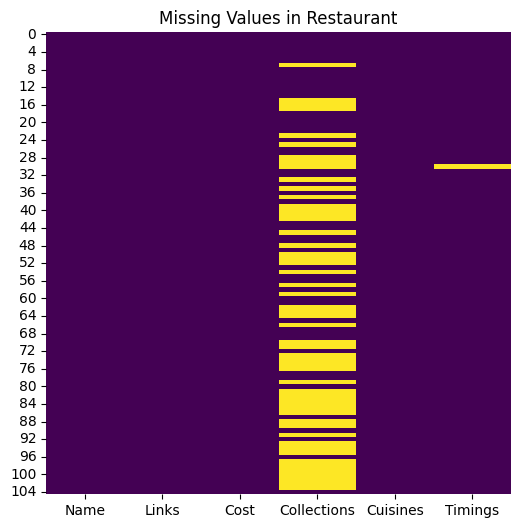

In [11]:
# Visualizing the missing values

# Visualize missing values in the Restaurant
plt.figure(figsize=(6, 6))
sns.heatmap(meta_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Restaurant')
plt.show()

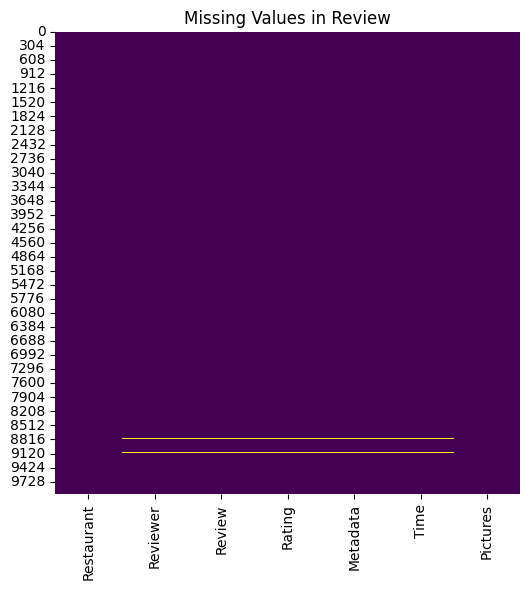

In [12]:
# Visualize missing values in the Review
plt.figure(figsize=(6, 6))
sns.heatmap(review_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Review')
plt.show()

### What did you know about your dataset?

Restaurant DataSet(meta_df):-



*   It contains 105 rows and 6 features.
*   Collection and Timing features has null values.

*   No duplicated Values.
*   Feature cost and timmings are of object datatype.

Review Dataset(review_df):-

*   It contains 10000 rows and 7 features.
*   All features have null values except picture and restaurant.

*   It has 36 duplicated rows.
*   Rating and Time are of object datatype.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(meta_df.columns)
print('\n')
print(review_df.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [14]:
# Dataset Describe
meta_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [15]:
review_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

**Zomato Restaurant**



*   Name : Name of Restaurants
*   Links : URL Links of Restaurants

*   Cost : Per person estimated Cost of dining
*   Collection : Tagging of Restaurants w.r.t. Zomato categories


*   Cuisines : Cuisines served by Restaurants
*   Timings : Restaurant Timings


**Zomato Restaurant Reviews**



*   Restaurant : Name of the Restaurant
*   Reviewer : Name of the Reviewer


*   Review : Review Text
*   Rating : Rating Provided by Reviewer


*   MetaData : Reviewer Metadata - No. of Reviews and followers
*   Time: Date and Time of Review


*   Pictures : No. of pictures posted with review















### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in meta_df.columns.tolist():
  print("No. of unique values in ",i,"is",meta_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [17]:
# Check Unique Values for each variable.
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
#before changing data type for cost checking values
meta_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [19]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(',','').astype('int64')

In [20]:
#top 5 costlier restaurant
meta_df.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [21]:
#top 5 economy restaurant
meta_df.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

Name  Cost
85         Momos Delight   200
29    Hunger Maggi Point   200
101         Sweet Basket   200
89   Mohammedia Shawarma   150
23                  Amul   150

In [22]:
#Restaurant that share same price
meta_df_dict = {}
amount = meta_df.Cost.values.tolist()

#adding Restaurant name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = meta_df[meta_df['Cost'] == price]
    meta_df_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_meta_df=pd.DataFrame.from_dict([meta_df_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same
#same_price_meta_df = meta_df.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
meta_df_count = meta_df.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_meta_df = same_price_meta_df.merge(meta_df_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max Restaurant that share same price
same_price_meta_df.sort_values('Total_Restaurant', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
4    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
17   600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
20   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
2   1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
8    400  [Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...                 6

In [23]:
#restaurant which has max price
same_price_meta_df.sort_values('Cost', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
26  2800             [Collage - Hyatt Hyderabad Gachibowli]                 1
22  2500                 [Feast - Sheraton Hyderabad Hotel]                 1
12  1900  [10 Downing Street, Jonathan's Kitchen - Holid...                 2
25  1800          [Cascade - Radisson Hyderabad Hitec City]                 1
27  1750                  [Zega - Sheraton Hyderabad Hotel]                 1

In [24]:
# spliting the cusines and storing in list
cuisine_value_list = meta_df.Cuisines.str.split(', ')

In [25]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [26]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [27]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [28]:
# spliting the collection and storing in list
Collections_value_list = meta_df.Collections.dropna().str.split(', ')

In [29]:
# storing all the Tags in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [30]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [31]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

In [32]:
# removing null values
review_df = review_df.dropna()

In [33]:
#converting rating to float
review_df.drop(review_df[(review_df['Rating']=='Like')].index,inplace=True)
review_df['Rating']= review_df['Rating'].astype('float64')
review_df.shape

(9954, 7)

In [34]:
# Extracting details from metadata
review_df['Reviewer_Total_Review']=review_df['Metadata'].str.split(',').str[0]
review_df['Reviewer_Followers']=review_df['Metadata'].str.split(',').str[1]
review_df['Reviewer_Total_Review']=pd.to_numeric(review_df['Reviewer_Total_Review'].str.split(' ').str[0])
review_df['Reviewer_Followers']=pd.to_numeric(review_df['Reviewer_Followers'].str.split(' ').str[1])

In [35]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  Reviewer_Total_Review  \
0   1 Review , 2 Followers  5/25/2019 15:54         0                      1   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0                      3   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0                      2   
3    1 Review , 1 Follower  5/24/2019 22:11         0                      1   
4  3 Reviews , 2 Followers  5/24/2019 21:37         0                      3   

   Reviewer_Followers  
0                 2.0  
1                 2.0  
2                 3.0  
3                 1.0  
4                 2.0

In [36]:
#Extracting review time,year,month and Hour for analysis
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Review_Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Review_Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Review_Hour'] = pd.DatetimeIndex(review_df['Time']).hour

In [37]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                      1                 2.0         2019             5   
1                      3                 2.0         2019             5   
2                      2                 3.0         2019             5   
3                      1                 1.0         2019             5   
4                      3                 2.0         2019             5   

   Review_Hour  
0           15  
1           14  
2           22  
3           22  
4           21

### What all manipulations have you done and insights you found?

**Restaurant Data:**

*   The "cost" feature's data type has been converted from object to integer to ensure consistency and facilitate numeric analysis.


*   Top 5 Restayrant has been shown
*   Top 5 Cusine has been sorted out



**Review Data:**



*   Due to the limited number of missing values in the review data, they were removed to maintain data integrity.
*   The "rating" feature has been converted from object to float to enable more precise analysis.


*   Valuable information such as "followers" and "reviews" has been extracted from the metadata, enriching the dataset.
*   To enhance the analysis further, additional details such as "Time," "Year," "Month," and "Hour" of review creation have been extracted, providing deeper temporal insights.







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [38]:
# Chart - 1 visualization code
# Top 10 Cuisines by Restaurant count
# Splitting all cuisines to list
cuisine_list = meta_df['Cuisines'].str.split(', ').apply(lambda x : [word for word in x] )

In [39]:
cuisine_top_dict = {}
for x in cuisine_list:
  for cuisine in x:
    if cuisine in cuisine_top_dict:
      cuisine_top_dict[cuisine] += 1
    else :
      cuisine_top_dict[cuisine] = 1
cuisine_top_df = pd.DataFrame(((k,vals) for k,vals in cuisine_top_dict.items()),columns=['Cuisine','Restaurant count']).sort_values(by= 'Restaurant count' ,ascending=False).head(10)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'Continental'),
  Text(3, 0, 'Biryani'),
  Text(4, 0, 'Fast Food'),
  Text(5, 0, 'Asian'),
  Text(6, 0, 'Italian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'South Indian'),
  Text(9, 0, 'Bakery')])

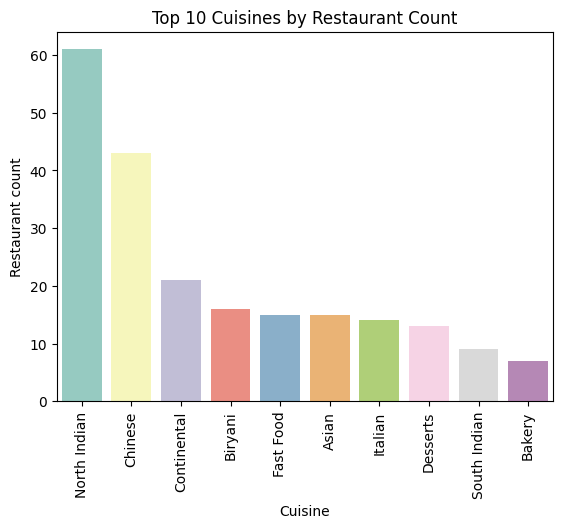

In [40]:
sns.barplot(x=cuisine_top_df['Cuisine'], y=cuisine_top_df['Restaurant count'], palette='Set3')
plt.title("Top 10 Cuisines by Restaurant Count")
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

It presents a variety of cuisines offered by restaurants in terms of count.

##### 2. What is/are the insight(s) found from the chart?

North Indian restaurants are prevalent, primarily due to a significant number of patrons originating from the North Indian region.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## The data suggests a significant demand for North Indian and Chinese cuisines. Hence, it would be strategically wise to concentrate on catering to these particular customer segments.

#### Chart - 2

Text(0, 0.5, 'Max Followers')

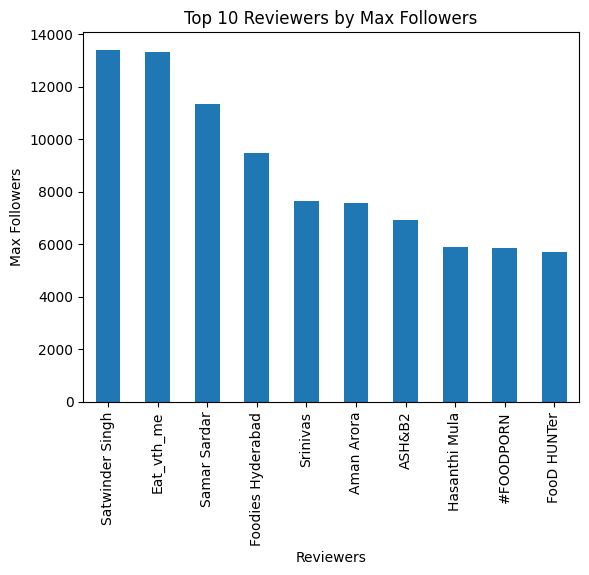

In [41]:
# Chart - 2 visualization code
# Group the data by 'Reviewer' and find the maximum 'Reviewer_Followers' for each reviewer
max_followers_by_reviewer = review_df.groupby('Reviewer')['Reviewer_Followers'].max()

# Sort the results in descending order and select the top 10
top_10_reviewers = max_followers_by_reviewer.sort_values(ascending=False).head(10)

# Create a bar plot
top_10_reviewers.plot(kind='bar')

# Set the plot title and labels if needed
plt.title("Top 10 Reviewers by Max Followers")
plt.xlabel("Reviewers")
plt.ylabel("Max Followers")

##### 1. Why did you pick the specific chart?

These individuals possess the largest number of followers, suggesting that their reviews hold the potential to sway a broader audience.

##### 2. What is/are the insight(s) found from the chart?

We found that Satwinder Singh and Eat_with_me are the top two reviewers with the highest number of followers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If we need advertising services, these individuals could be potential options.

#### Chart - 3

In [42]:
from scipy.stats import norm

In [43]:
#merging both data frame
meta_df = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta_df.merge(review_df, on = 'Restaurant')
merged.shape

(9954, 17)

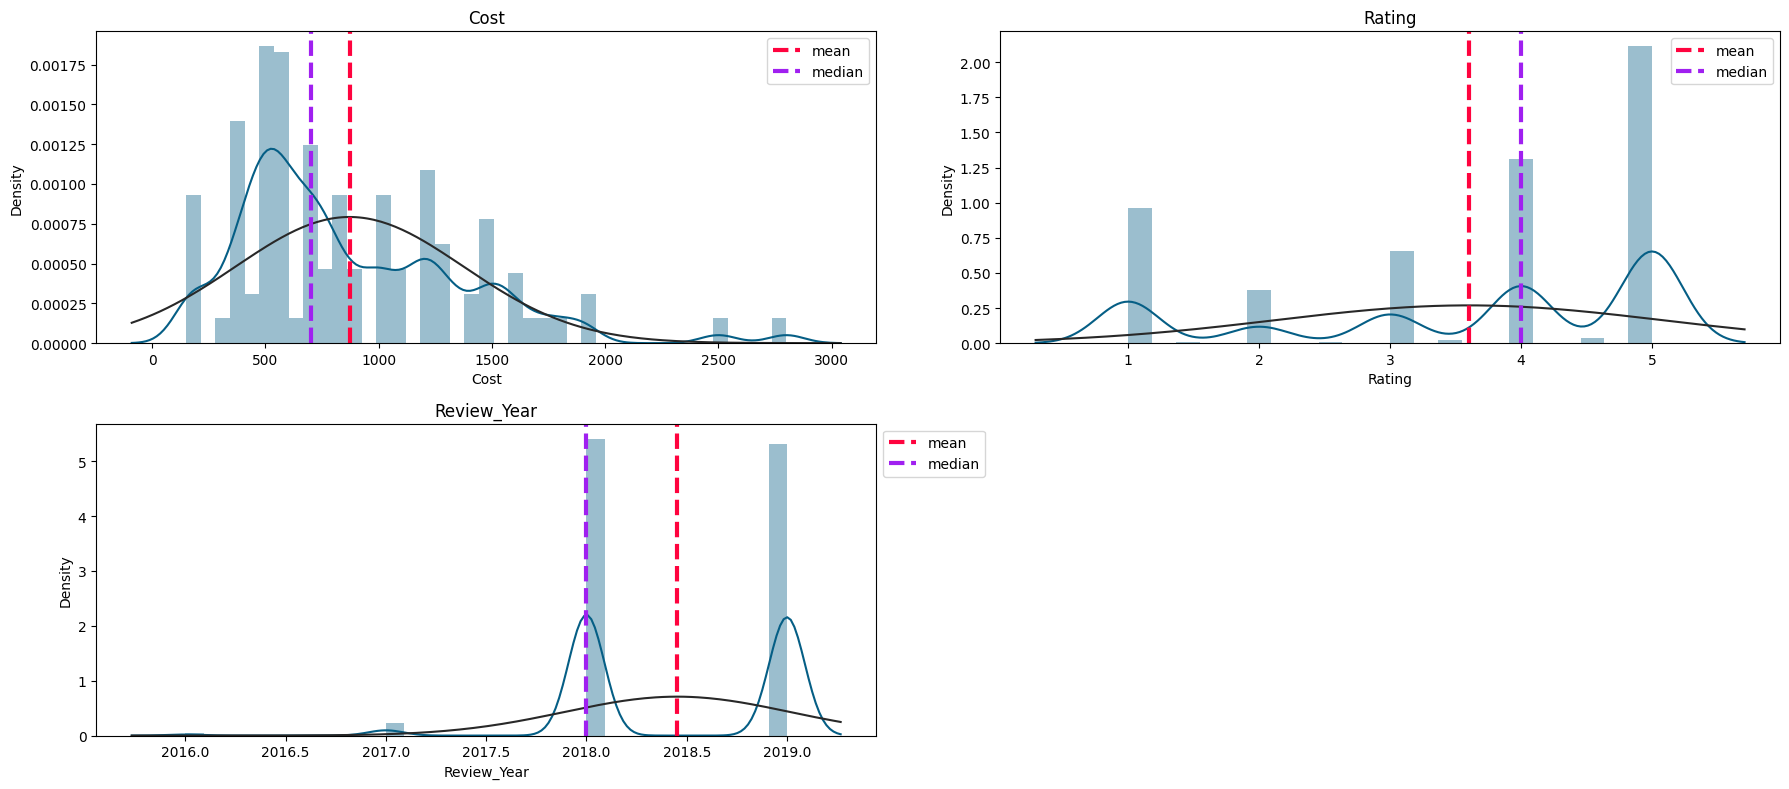

In [44]:
# Chart - 3 visualization code
from scipy.stats import norm
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Distplot is a useful tool for visualizing the distribution of a feature.

##### 2. What is/are the insight(s) found from the chart?

*   All three exhibit skewness.
*   The majority of restaurants have a price range of 500.

*   There is a higher number of reviews in 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Price always plays an important role in any business, along with ratings which indicate the level of engagement for the product.

However, in this chart, it is difficult to discern any impact on the business when plotted alone.

#### Chart - 4

In [45]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [46]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

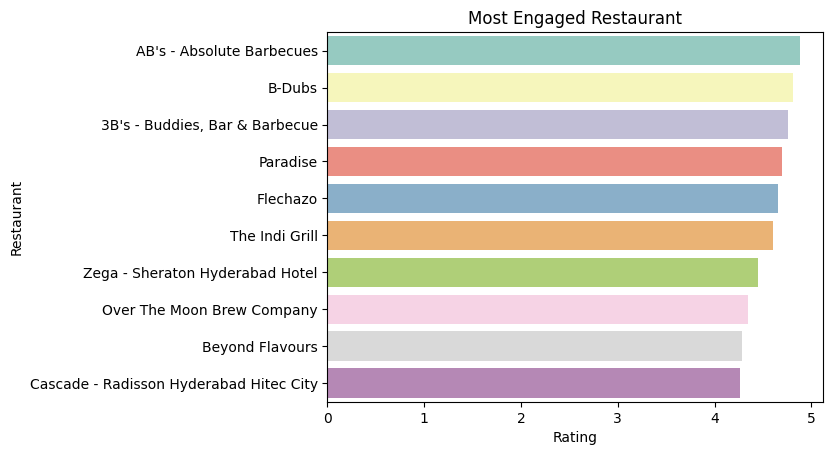

In [47]:
# Chart - 4 visualization code
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant', palette='Set3')
plt.title('Most Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot for the above graph because it displays the frequency levels for different categories.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

#### Chart - 5

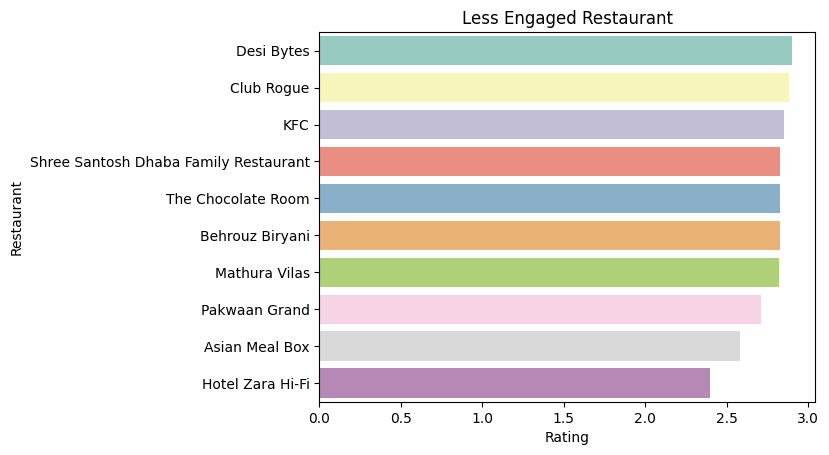

In [48]:
# Chart - 5 visualization code
#chart for less liked Restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant', palette='Set3')
plt.title('Less Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot for the above graph because it displays the frequency levels for different categories.

##### 2. What is/are the insight(s) found from the chart?

Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.`

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Some restaurants display lower ratings, indicating potential negative growth if not monitored closely. For instance, KFC appears in the lower-rated category. It's likely listed on the platform due to its widespread popularity and to capitalize on increased sales and demand. However, these establishments may not be fully dedicated to the platform, potentially impacting revenue generation.

#### Chart - 6

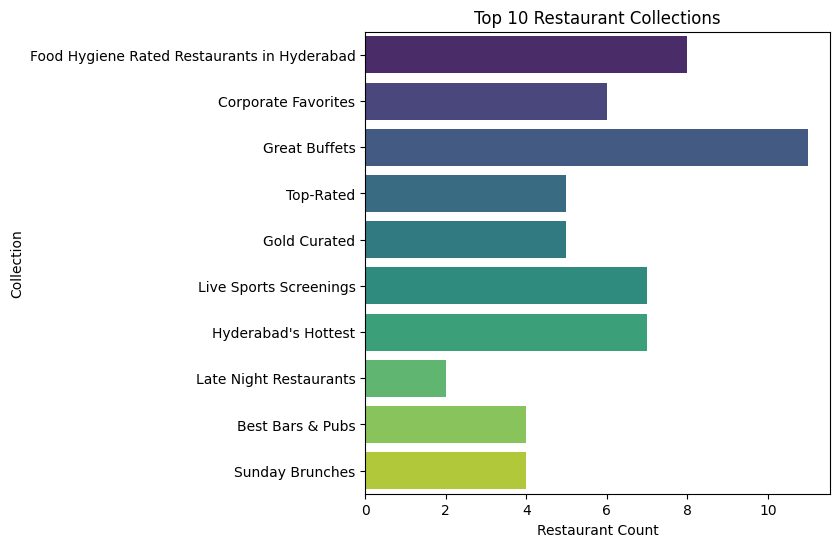

In [49]:
# Chart - 6 visualization code
# Plot the top collections
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
ax = sns.barplot(y=Collections_df['Tags'].head(10),
                 x=Collections_df['Number of Restaurants'].head(10),
                 palette='viridis')
plt.xlabel('Restaurant Count')
plt.ylabel('Collection')
plt.title('Top 10 Restaurant Collections')  # Add your title here


plt.show()

#### Chart - 7

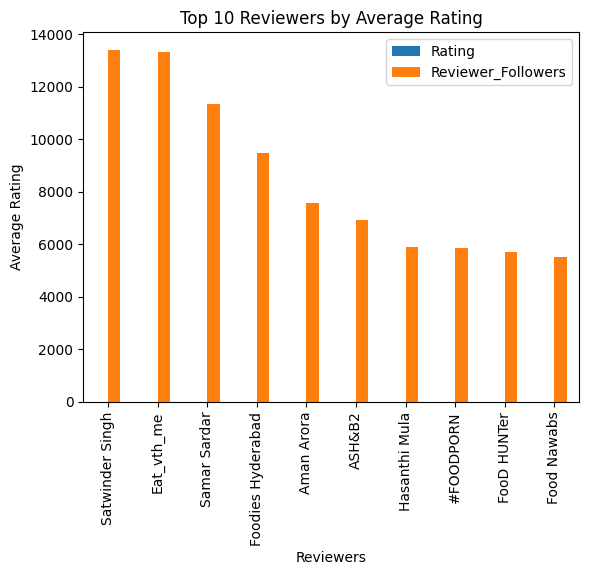

In [50]:
# Group the data by 'Reviewer', calculate the mean 'Rating' and maximum 'Reviewer_Followers'
reviewer_stats = review_df.groupby('Reviewer')[['Rating', 'Reviewer_Followers']].mean()

# Sort the results by 'Rating' in descending order and select the top 10
top_10_reviewers_stats = reviewer_stats.sort_values(by=['Reviewer_Followers'], ascending=False).head(10)

# Plot the bar chart
ax = top_10_reviewers_stats.plot(kind='bar')

# Set the plot title
plt.title("Top 10 Reviewers by Average Rating")

# Set labels if needed
plt.xlabel("Reviewers")
plt.ylabel("Average Rating")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

It's crucial to analyze the average ratings given by the most-followed reviewers as it helps in evaluating their potential biases.

##### 2. What is/are the insight(s) found from the chart?

For instance, reviewers like 'eat_vth_me' and 'foodporn' have consistently given an average rating of 5. This could imply either frequent visits to top-notch restaurants or a tendency to rate all restaurants with a perfect score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights presented in charts are valuable for sentiment analysis and offer crucial context for restaurant reviews.

#### Chart - 8

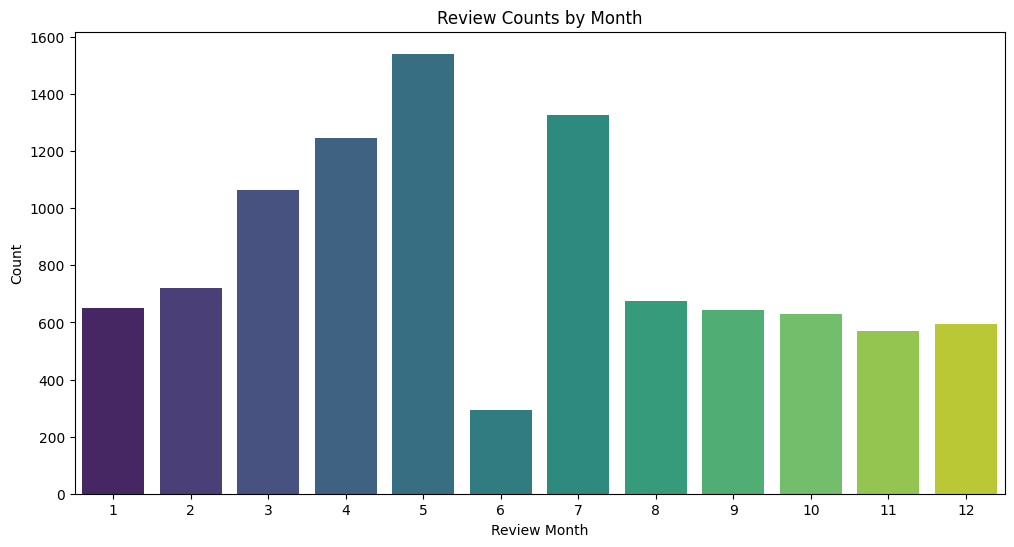

In [51]:
# Chart - 8 visualization code
# Calculate review counts for each month
review_month_counts = review_df['Review_Month'].value_counts()

# Sort months based on review counts in descending order
sorted_months = review_month_counts.sort_values(ascending=False).index

# Create a bar plot for Review_Month
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_months, y=review_month_counts[sorted_months], palette="viridis")

# Set x and y labels
plt.xlabel("Review Month")
plt.ylabel("Count")

# Set the title
plt.title("Review Counts by Month")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To comprehend the peak periods of engagement for restaurants.

##### 2. What is/are the insight(s) found from the chart?

From February to August, there is a highly active period for restaurants, except for June.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

During these time frames, Zomato may consider increasing their delivery personnel and offering promotional codes to boost activity in less active periods

**Price Point for High Rated and Low Rated Restaurant**

#### Chart - 9

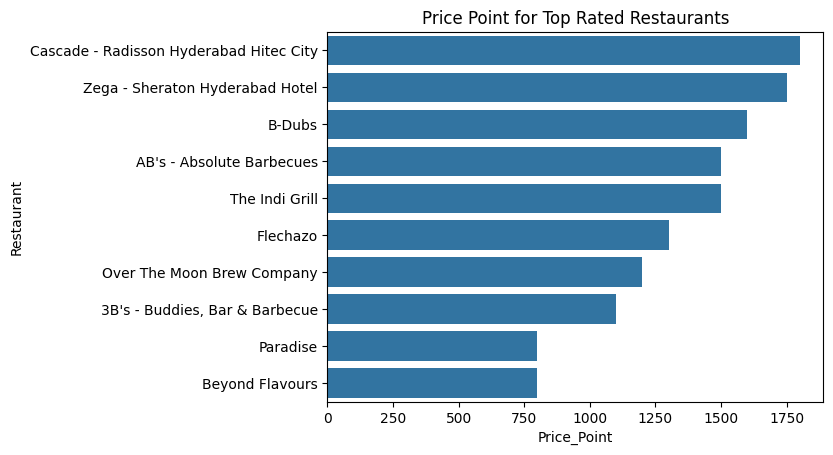

In [52]:
# Chart - 9 visualization code
sns.barplot(data=most_engaged_hotel[:10].sort_values(by='Price_Point', ascending=False), x='Price_Point', y='Restaurant')
plt.title('Price Point for Top Rated Restaurants')
plt.show()

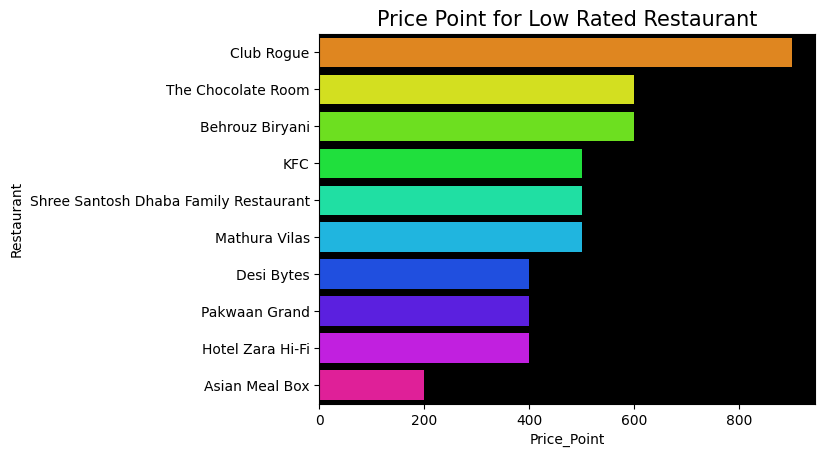

In [53]:
# Visualization code for price point of low-rated restaurant
sns.barplot(data=most_engaged_hotel[-10:].sort_values(by='Price_Point', ascending=False), x='Price_Point', y='Restaurant', palette='hsv')
plt.title('Price Point for Low Rated Restaurant', size=15)

# Getting the current axes and setting the background color
ax = plt.gca()
ax.set_facecolor("black")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I opted for a bar plot as it provides a clear and concise visualization of hotel names and their respective price points. Bar plots are effective for comparing different categories (hotel names) and their associated values (price points) on a single chart. Additionally, they offer insights into the price range of each hotel and facilitate comparisons between them.

##### 2. What is/are the insight(s) found from the chart?

The price point for the highly rated hotel AB's Absolute Barbecues is $1500, whereas the price point for the low-rated restaurant Hotel Zara Hi-Fi is $400.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since this is a customer-centered business, i.e., direct-to-consumer, it's crucial to understand the price point to make the business more affordable for everyone. Therefore, cracking the right price point is essential.

In this analysis, the most-liked restaurant has a price point of $1500, slightly higher than the average. However, since this business is all about food quality and taste, it shows maximum engagement, indicating that it serves the best quality of food. A deeper analysis of the review text can provide insights into why this price point is preferred the most.

Some restaurants with the lowest ratings, despite having a low price point, are not engaging customers effectively. This could negatively impact the business. However, it's premature to conclude that these restaurants should be delisted. Factors such as the cuisine they serve and the locality they operate in play a role. Small promotional offers could be introduced for low-rated restaurants to boost sales in such cases.

#### Chart - 10

**Proportion of Cuisine Sold by Most Restaurant - Pie Chart for Top 5 most Selling Cuisine**

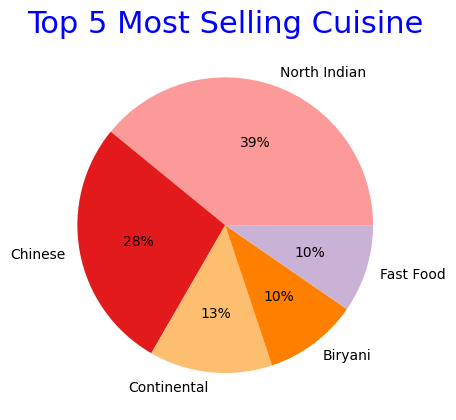

In [54]:
# Chart - 10 visualization code

#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

***Wordcloud for Cuisine***

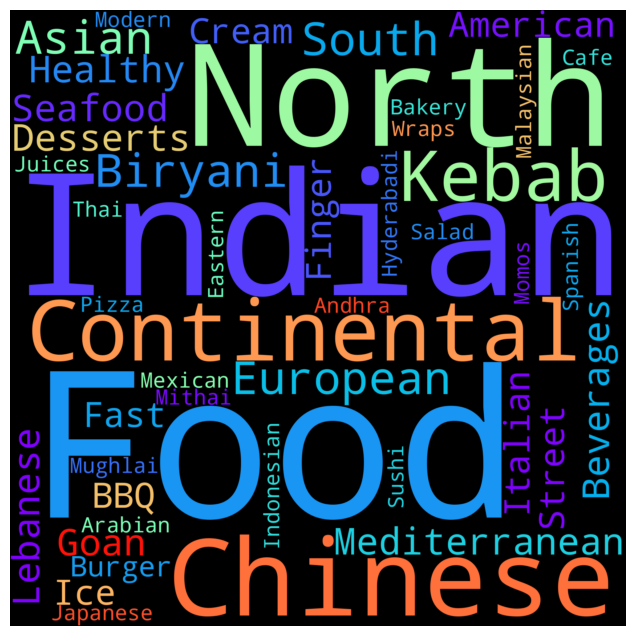

In [55]:
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

I opted for a pie chart to illustrate the proportion of each quantity and utilized a word cloud to visualize all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

The chart above illustrates that the majority of Restaurant sell North Indian cuisine, followed by Chinese cuisine.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying commoditized cuisines is crucial for understanding competitive advantages and challenges. It helps restaurants differentiate themselves by offering unique options. Commoditized cuisines may incur higher costs, prompting businesses to focus on non-commoditized choices or find cost-saving strategies.

This identification also reveals consumer preferences, guiding menu decisions, pricing, and promotions. Pie charts display popular cuisines, aiding in strategic decisions like promoting or expanding specific cuisines. Similarly, word clouds highlight frequently mentioned cuisines in customer reviews, indicating popularity and areas for improvement.

However, these charts alone don't provide comprehensive business insights. They don't account for profitability, competition, or external factors like market trends. Zomato must supplement this data with other information for informed decision-making.

#### Chart - 11

# **Most used Tags**

Pie Chart for Top 5 most Selling Cuisine

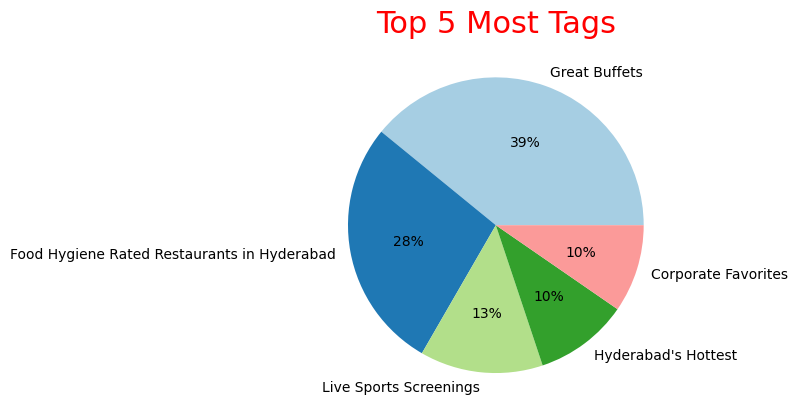

In [56]:
# Chart - 11 visualization code

#list of all collection
collection_list = Collections_df.sort_values('Number of Restaurants',
                          ascending = False)['Tags'].tolist()[:5]
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Tags', size =22, color= 'red')
plt.show()

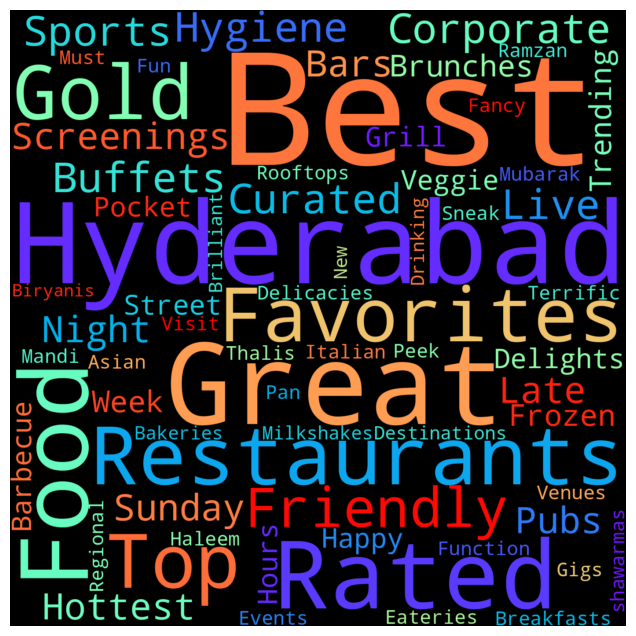

In [57]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False,
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

# **Variation of Ratings W.R.T time (Bivariate with Categorical - Numerical)**

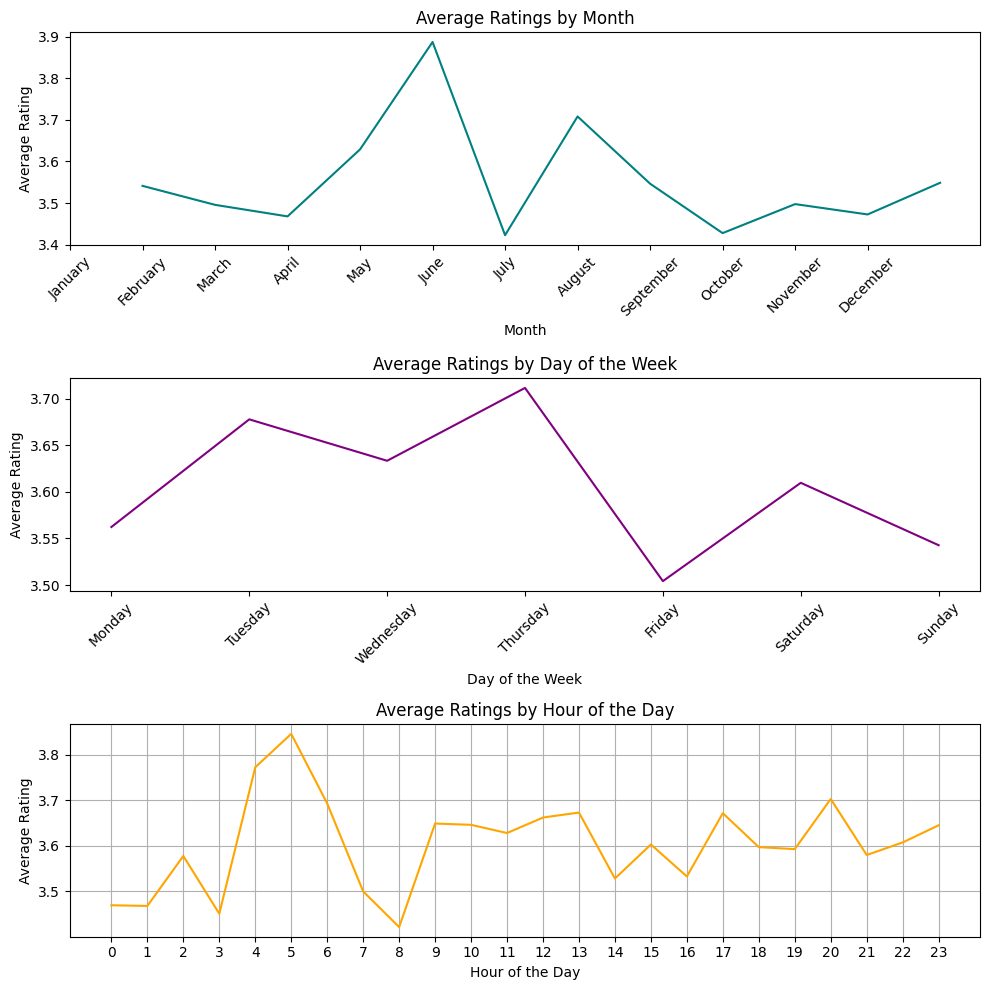

In [58]:
#@title Trend Analysis
import pandas as pd
import datetime as dt

# Converting 'Time' column to datetime
review_df['Time'] = pd.to_datetime(review_df['Time'])

# Extracting month, day of the week, and hour
review_df['Month'] = review_df['Time'].dt.month
review_df['DayOfWeek'] = review_df['Time'].dt.day_name()
review_df['Hour'] = review_df['Time'].dt.hour

# Seasonal Trend Analysis: Average Rating by Month
monthly_avg_rating = review_df.groupby('Month')['Rating'].mean()

# Weekly Trend Analysis: Average Rating by Day of the Week
weekly_avg_rating = review_df.groupby('DayOfWeek')['Rating'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Hourly Trend Analysis: Average Rating by Hour of the Day
hourly_avg_rating = review_df.groupby('Hour')['Rating'].mean()

# Plotting all three trends in a single figure with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Monthly Trend Plot
axs[0].plot(monthly_avg_rating, color='teal')
axs[0].set_title('Average Ratings by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Rating')
axs[0].set_xticks(range(0, 12))
axs[0].set_xticklabels([dt.date(2000, m, 1).strftime('%B') for m in range(1, 13)])
axs[0].tick_params(axis='x', rotation=45)

# Weekly Trend Plot
axs[1].plot(weekly_avg_rating, color='purple')
axs[1].set_title('Average Ratings by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Average Rating')
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axs[1].tick_params(axis='x', rotation=45)

# Hourly Trend Plot
axs[2].plot(hourly_avg_rating, color='orange')
axs[2].set_title('Average Ratings by Hour of the Day')
axs[2].set_xlabel('Hour of the Day')
axs[2].set_ylabel('Average Rating')
axs[2].set_xticks(range(0, 24))
axs[2].grid(True)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Average Ratings by Month:**


*   There is a noticeable peak in June, indicating the highest average ratings occur in this month.
*   There are lower points, particularly noticeable in April and September, suggesting a potential seasonal impact on ratings

**Average Ratings by Day of the Week:**


*   Ratings peak mid-week, particularly on Wednesday, and then there is a decline towards the weekend.
*   The lowest average ratings occur on Friday.

**Average Ratings by Hour of the Day:**



*   There are peaks in the early hours (around 5 AM), mid-morning (around 9 AM), and late evening (around 8 PM).
*   There are noticeable dips in the late morning (around 7-8 AM) and early evening (around 2-4 PM).







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Implications:**



*   **Positive Impact: ** The insights could lead to targeted marketing during peak times, quality control measures when lower ratings are expected, and staffing adjustments to ensure service quality during critical hours or days.


**Strategic Applications:**



*   **Seasonal Adjustments:** The variation in monthly ratings could suggest that the restaurants should adjust their offerings or operations seasonally, perhaps offering summer specials or comfort food in colder months.
*   **Weekly Planning: ** Understanding that ratings dip over the weekend could imply that customers have higher expectations or that there are operational challenges during these days.


*   **Hourly Focus:** The hourly variations might reflect changes in customer base or staff shifts. Special attention to service quality at known low points, and maintaining the high standards during the peaks, could enhance overall ratings.








#### Chart - 14 - Correlation Heatmap

In [59]:
# Correlation Heatmap visualization code

# Heatmap of review_df
meta = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta.merge(review_df, on = 'Restaurant')
merged.shape

(9954, 20)

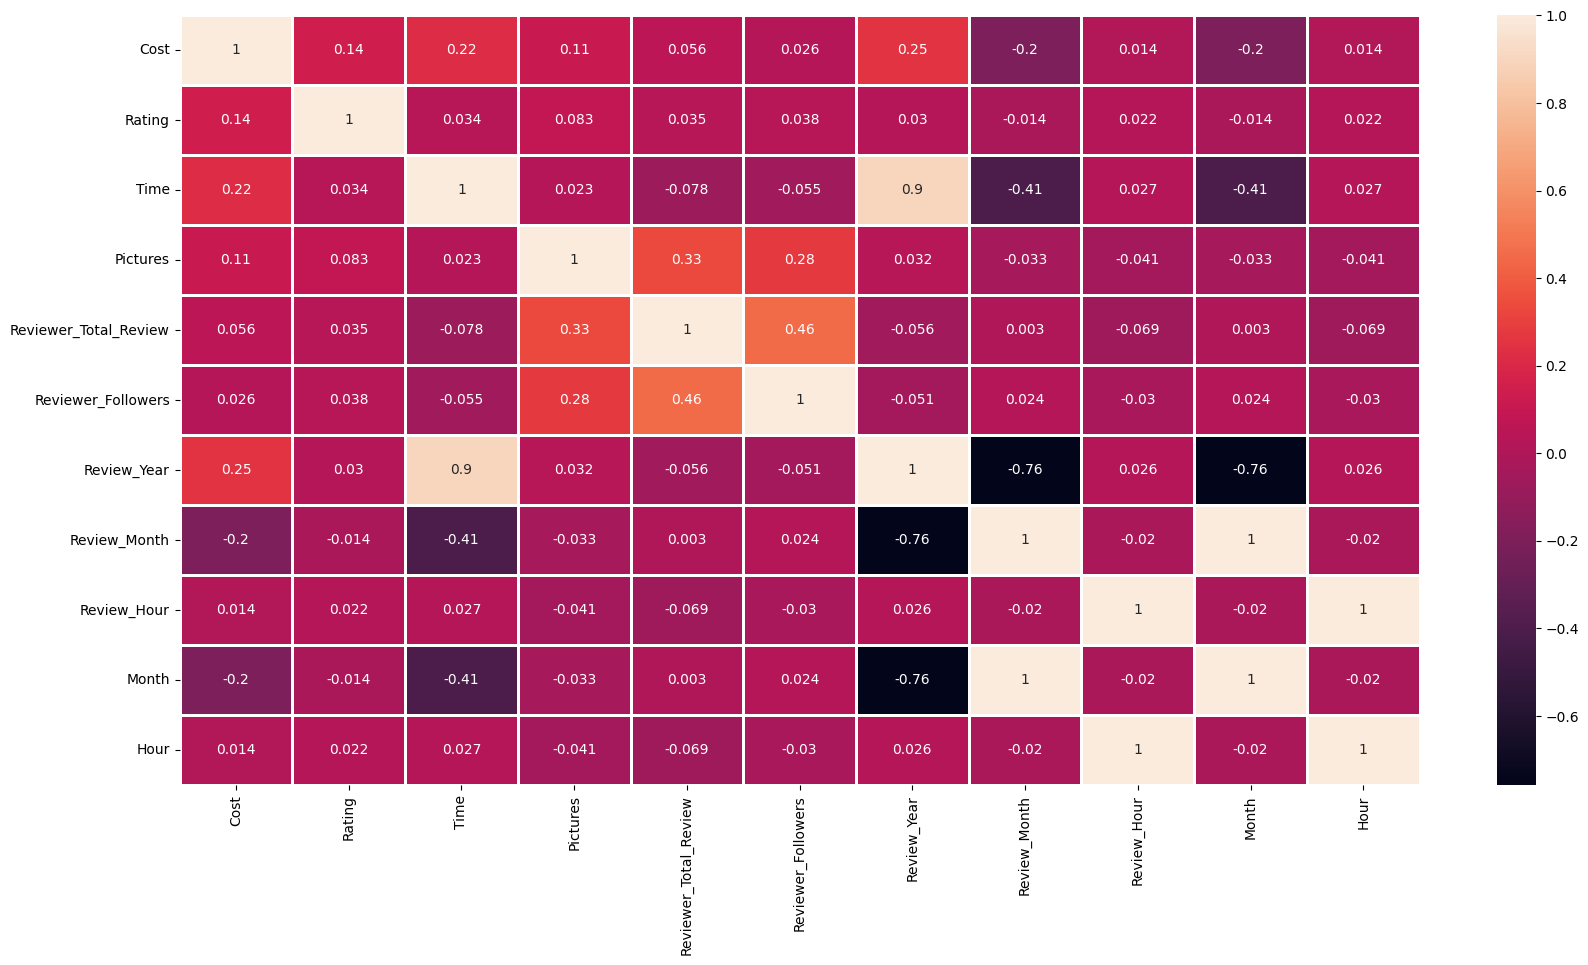

In [60]:
# Create a correlation matrix for the desired columns
correlation_matrix = merged[merged.describe().columns].corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='rocket', linewidths=1)

# Show the heatmap
plt.show()

##### 1. Why did you pick the specific chart?

To assess the correlation among all numeric variables.

##### 2. What is/are the insight(s) found from the chart?

The dataset contains limited data for certain years, such as 2018 and 2019, with particularly sparse data for the years 2016 and 2017. Consequently, the correlation analysis may not yield significant insights.

#### Chart - 15 - Pair Plot

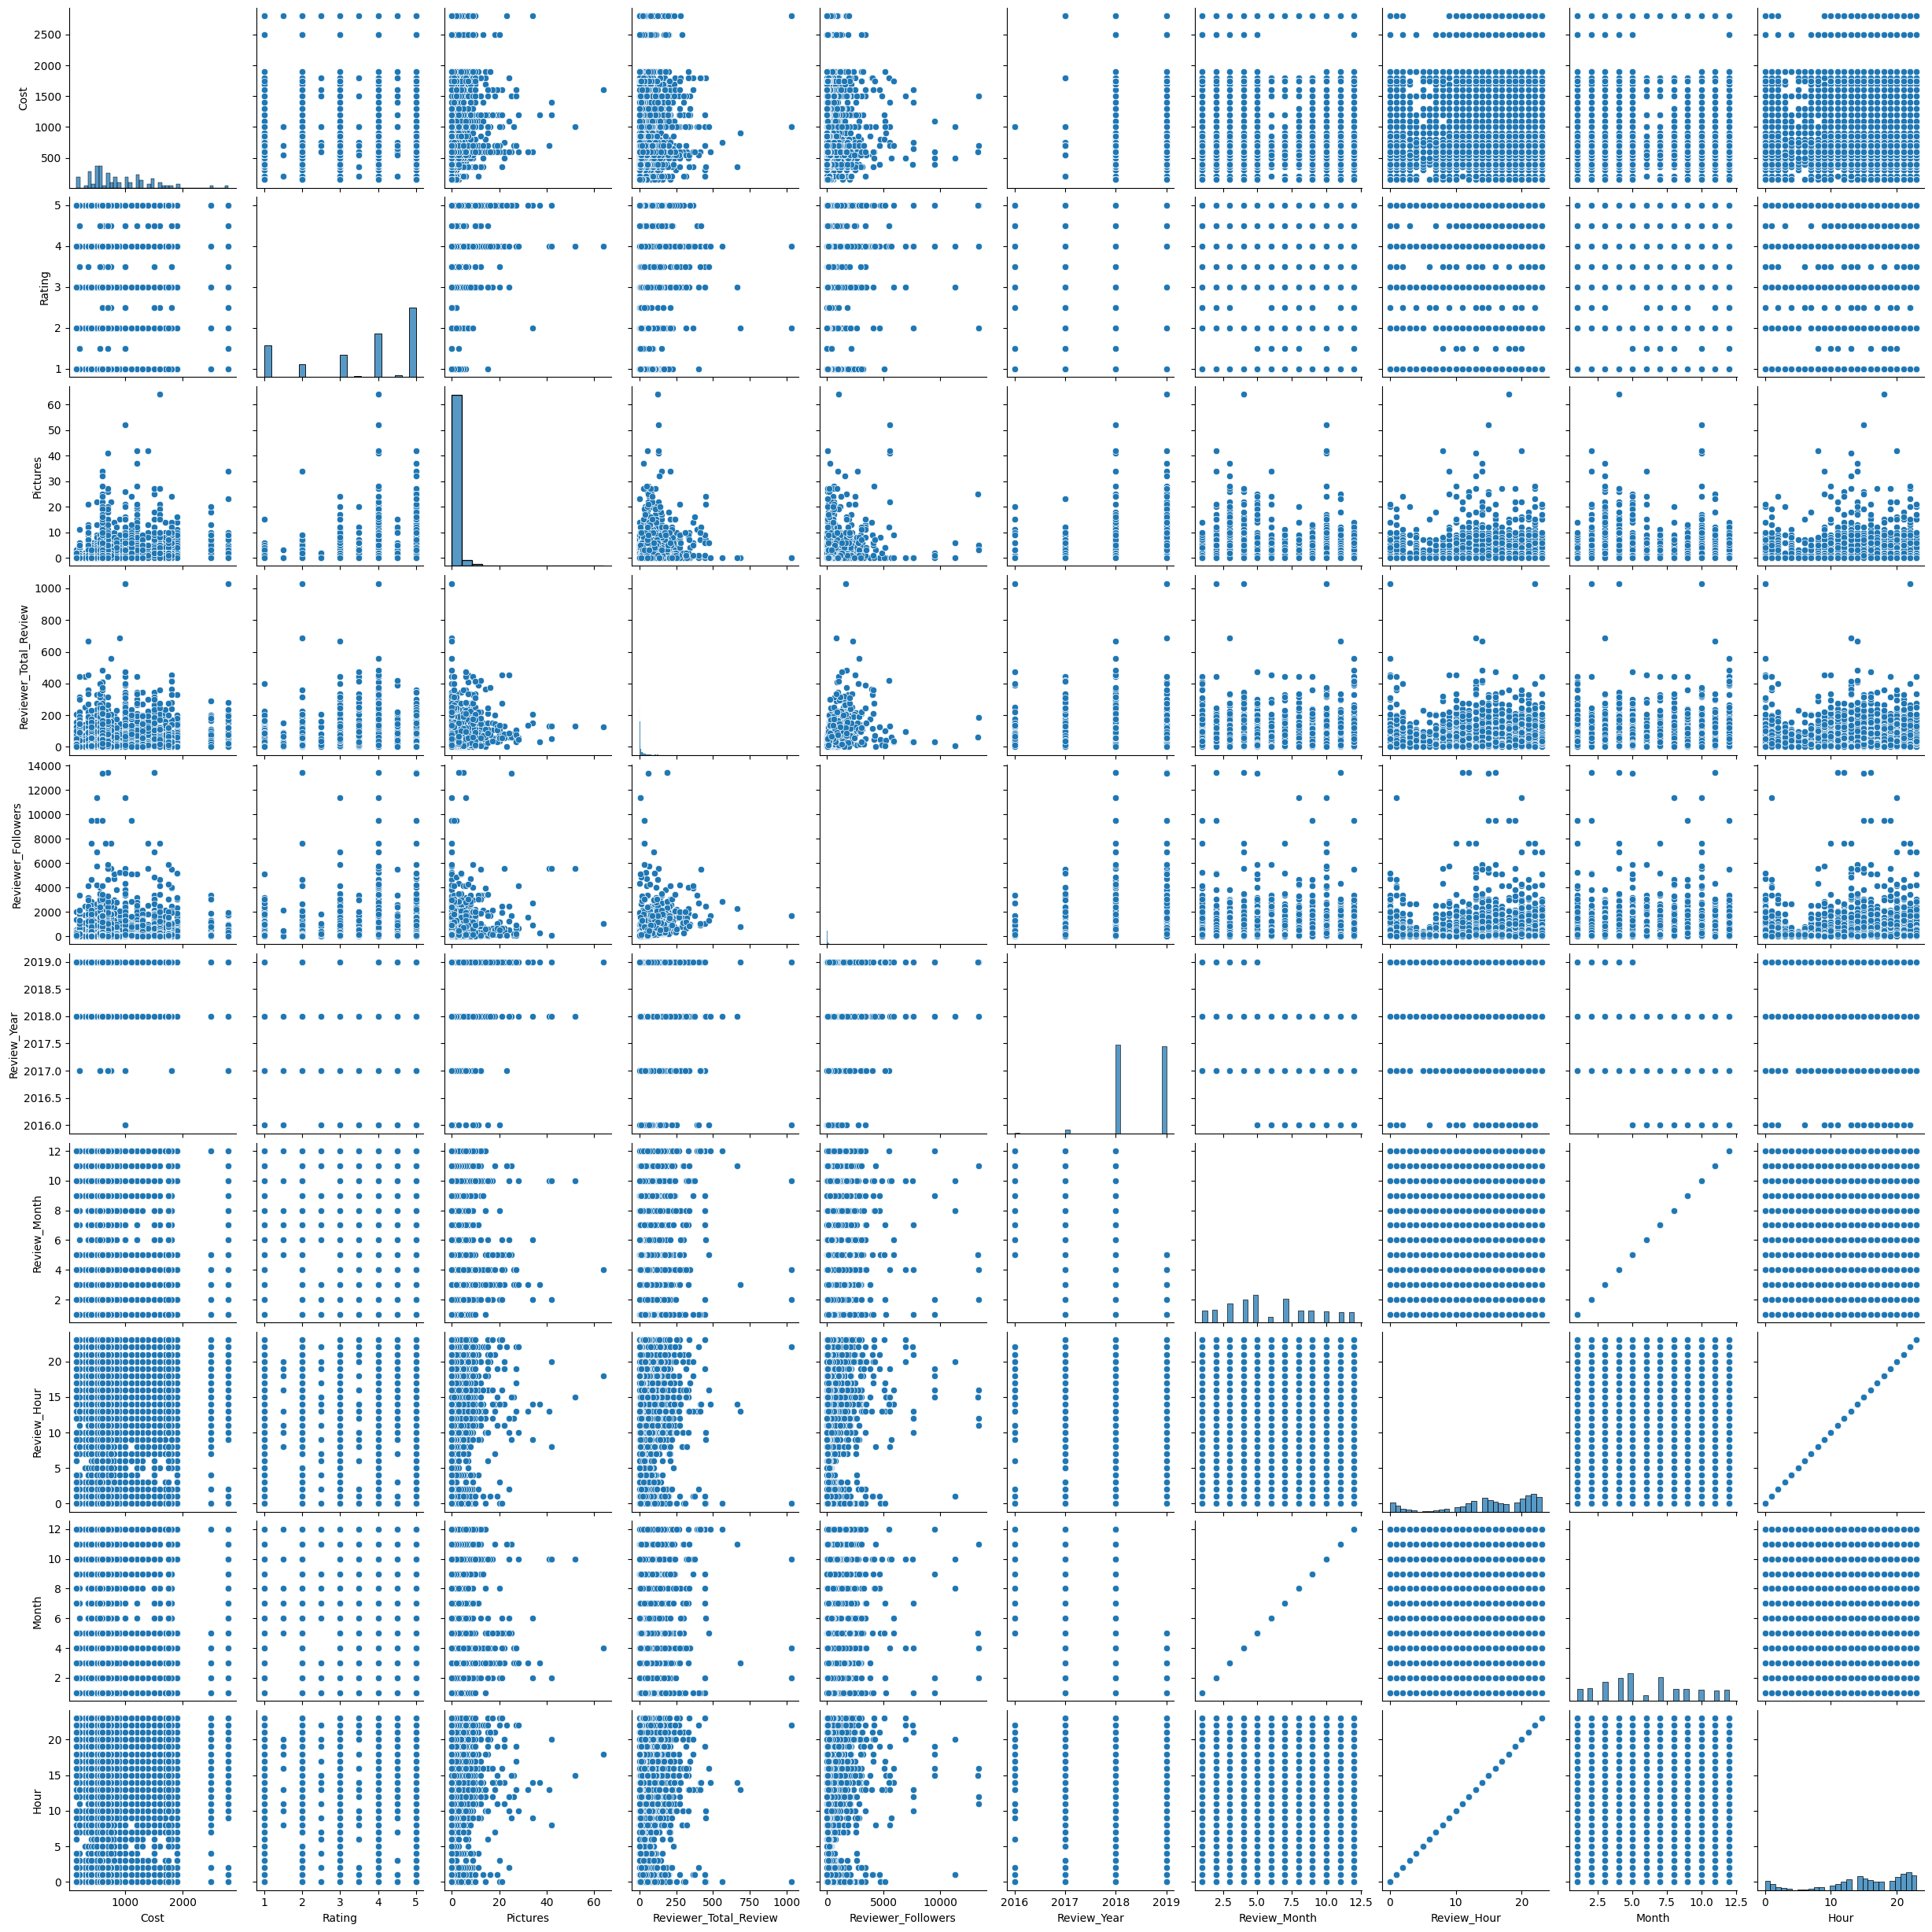

In [61]:
# Pair Plot visualization code
# Pair Plot visualization code
sns.pairplot(merged);

##### 1. Why did you pick the specific chart?

A pair plot is utilized to comprehend the optimal set of features for explaining the relationship between two variables or for forming the most distinct clusters. It also aids in creating simple classification models by drawing basic lines or achieving linear separation in our dataset.

Hence, I employed a pair plot to analyze the data patterns and relationships between the features. It's akin to a correlation map, but here, you'll obtain a graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*   Restaurants that receive higher ratings typically offer higher-priced menu items.
*   The rating of a restaurant appears unaffected by the number of followers held by its most prominent reviewer.

*   Restaurants that provide a wider range of cuisines might garner higher ratings.





### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no correlation between rating and cost.

Alternate Hypothesis: There is a correlation between them.

Test Method: Conducting a Simple Linear Regression analysis.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value
# Conduct Statistical Test to Calculate P-Value
import statsmodels.formula.api as sm

model = sm.ols(formula='Rating ~ Cost', data=merged).fit()
p_value = model.pvalues[1]

if p_value < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Fail to reject the Null Hypothesis')

Reject the Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test used to calculate the p-value is simple linear regression.

##### Why did you choose the specific statistical test?

Linear regression was selected because it examines the connection between 'Rating' and 'Cost,' aiding in the assessment of whether cost significantly influences restaurant ratings.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The number of followers a reviewer has does not affect the rating of a restaurant.

Alternate Hypothesis: There is a positive relationship between them.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value
# Conduct Statistical Test to Calculate P-Value
import statsmodels.formula.api as sm

model = sm.ols(formula='Rating ~ Reviewer_Followers', data=merged).fit()
p_value = model.pvalues[1]

if p_value < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Fail to reject the Null Hypothesis')

Reject the Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test carried out to obtain the P-value utilizes linear regression employing the Ordinary Least Squares (OLS) method.

##### Why did you choose the specific statistical test?

Linear regression is suitable when exploring the connection between two continuous variables, as is the situation with "Rating" and "Reviewer_Followers."

In this context, linear regression assumes a linear relationship between the variables, which is a reasonable assumption.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between restaurant cuisines and the rating.

Alternate Hypothesis: There is a relationship between them.

Test Method: Chi-square (χ²) Test.

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value
# Conduct Statistical Test to Calculate P-Value
from scipy.stats import chi2_contingency
import pandas as pd

ct = pd.crosstab(merged['Cuisines'], merged['Rating'])
chi2, p, dof, expected = chi2_contingency(ct)

if p < 0.05:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test conducted to calculate the P-value is the Chi-squared test of independence.

##### Why did you choose the specific statistical test?

It is appropriate for analyzing the relationship between two categorical variables, which are "Cuisines" and "Rating" in this case.

The test allows for hypothesis testing to determine whether there is a statistically significant association between the variables, making it a suitable choice for this analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**Treating Duplicates**


*   Since all the duplicated data contain NaN values, it's best to drop these rows entirely as they won't be helpful and will only introduce unnecessary noise.



In [65]:
#deleting duplicate value from review dataset
review_df = review_df.drop_duplicates()

In [66]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {review_df.duplicated().value_counts()}, unique values with {len(review_df[review_df.duplicated()])} duplication")


Anymore duplicate left ? False    9954
Name: count, dtype: int64, unique values with 0 duplication


In [67]:
# Handling Missing Values & Missing Value Imputation
#Treating Missing Values
#Restaurant Dataset
meta_df.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [68]:
#checking the null value in timing
meta_df[meta_df['Timings'].isnull()]


Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [69]:
#filling null value in timings column
meta_df.Timings.fillna(meta_df.Timings.mode()[0], inplace = True)

In [70]:
#checking null values in Collections
missing_percentage = ((meta_df['Collections'].isnull().sum())/(len(meta_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [71]:
#dropping collection column since has more than 50% of null values
meta_df.drop('Collections', axis = 1, inplace = True)

In [72]:
#final checking of missing value
meta_df.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

In [73]:
#review missing value
review_df.isnull().sum()

Restaurant                  0
Reviewer                    0
Review                      0
Rating                      0
Metadata                    0
Time                        0
Pictures                    0
Reviewer_Total_Review       0
Reviewer_Followers       1574
Review_Year                 0
Review_Month                0
Review_Hour                 0
Month                       0
DayOfWeek                   0
Hour                        0
dtype: int64

In [74]:
#again checking the remaining values
null_counts = [(x, a) for x, a in review_df.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Reviewer_Followers', 1574)]

In [75]:
#filling null values in review and reviewer follower column
review_df = review_df.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [76]:
# final checking null values
review_df.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
Month                    0
DayOfWeek                0
Hour                     0
dtype: int64

In [77]:
#merging both dataset
meta_df = meta_df.rename(columns = {'Name':'Restaurant'})
merged = meta_df.merge(review_df, on = 'Restaurant')
merged.shape

(9954, 19)

### 2. Handling Outliers

**Detecting Anamoly**

In [78]:
# Handling Outliers & Outlier treatments
#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153002
Kurtosis - Cost: 1.569582
Skewness - Reviewer_Followers: 10.089345
Kurtosis - Reviewer_Followers: 151.211965


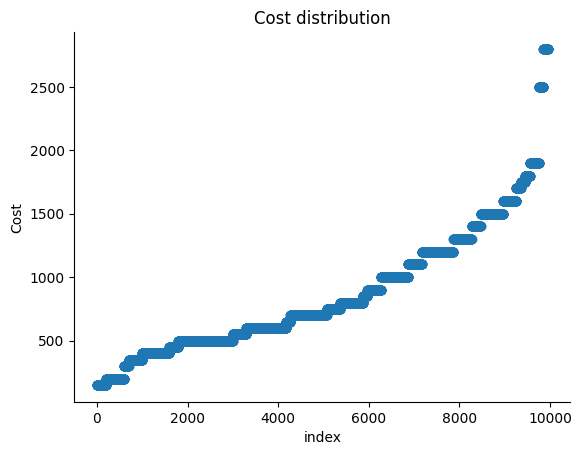

In [79]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

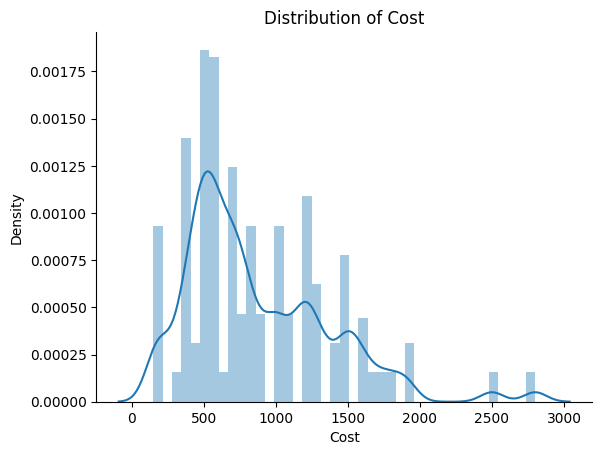

In [80]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

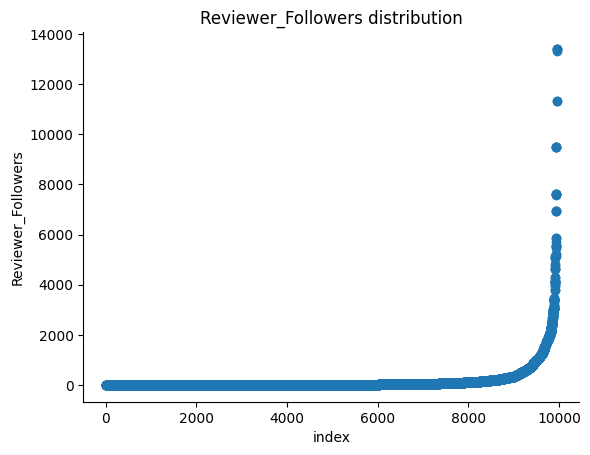

In [81]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

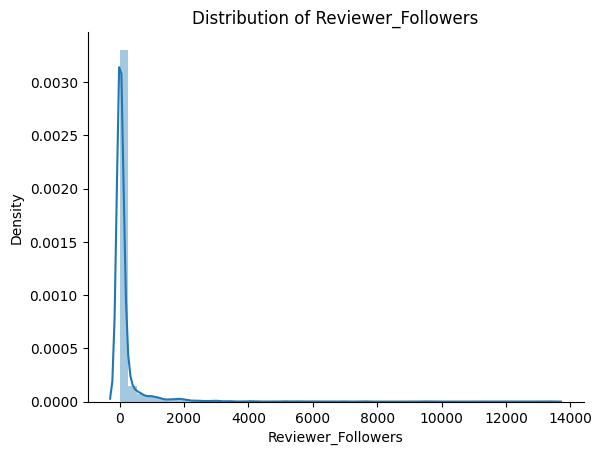

In [82]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [83]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

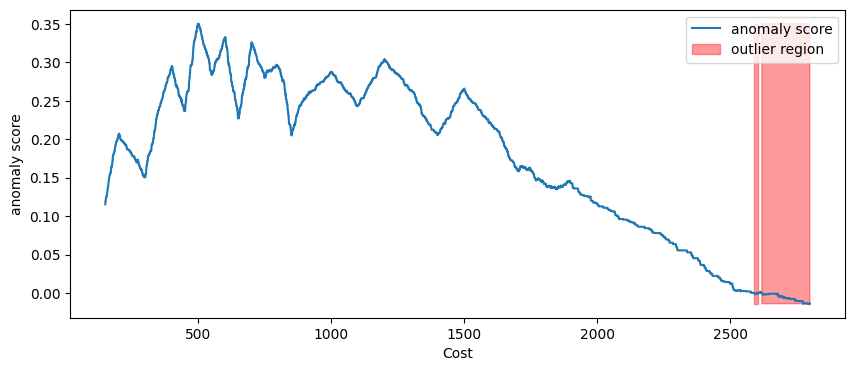

In [84]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [85]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))


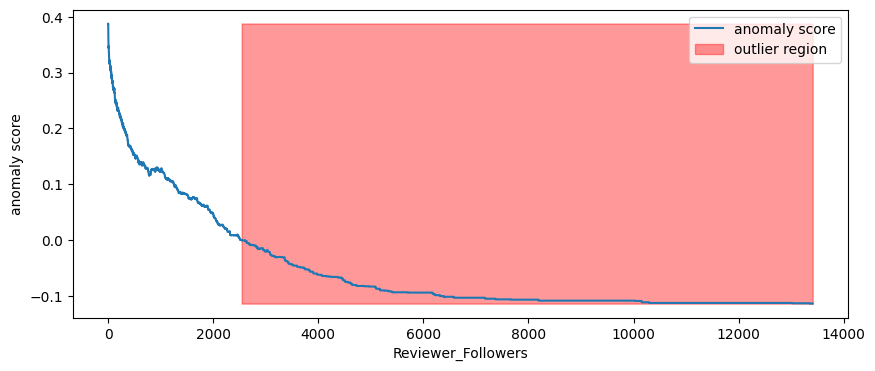

In [86]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

**2. Handling Outliers**

##### What all outlier treatment techniques have you used and why did you use those techniques?

As data is very less will not do outlier detection.

### 3. Categorical Encoding

In [87]:
# Encode your categorical columns
cluster_dummy = meta_df[['Restaurant','Cuisines']]
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
cluster_dummy = cluster_dummy.explode('Cuisines')
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [88]:
meta_df['Total_Cuisine_Count'] = meta_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [89]:
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})

In [90]:
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
meta_df = meta_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
meta_df.head(1)

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [91]:
cluster_dummy = meta_df[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')

In [92]:
cluster_dummy.head(1)

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  American  \
0  Beyond Flavours   800            4.28                    6         0   

   Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  Salad  \
0       0        0      0    0       0  ...             1      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             1        0            0      0     0      0  

[1 rows x 48 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

I encoded the 'cuisines' column using one-hot encoding, keeping the 'average rating' and 'cost' variables unchanged as they are numerical variables.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [93]:
# Expand Contraction
#creating new df for text processing of sentiment analysis
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

Reviewer                 Restaurant  Rating  \
3556  Tota Parvathi  Green Bawarchi Restaurant     4.0   
1887       Vaishali          10 Downing Street     5.0   

                                                 Review  
3556                                               good  
1887  One of the best restaurants I have visited in ...

In [94]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [95]:
sentiment_df.sample(2)

index          Reviewer                Restaurant  Rating  \
1090   1090  Krishnendu Kundu  Sardarji's Chaats & More     4.0   
7934   7934    Anil Modipalle              Olive Garden     1.0   

                                                 Review  
1090  Wahh ji waah! Dilli ki yaad dila diya apne toh...  
7934  Visited this place for lunch buffet after seei...

In [96]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.8 MB/s eta 0:00:00


In [97]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [98]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [99]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

#### 3. Removing Punctuations

In [100]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [101]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index         Reviewer                             Restaurant  Rating  \
6903   6903       Smita Vyas                         The Indi Grill     5.0   
6706   6706   Nawaz Mohammed  Yum Yum Tree - The Arabian Food Court     4.0   
276     276          Epicure                               Flechazo     4.0   
3072   3072  Anjanaa Karthik                             Pot Pourri     3.0   
1400   1400      Brave Stone              AB's - Absolute Barbecues     5.0   

                                                 Review  
6903  raza is the most humble and sweet person at th...  
6706  we were 2 friends wanted to eat some mandi i k...  
276   i feel veg starters shud be improvised we had ...  
3072  well this restaurant looked really appealing a...  
1400  it was excellent experience spiced thank krish...

#### 4. Removing URLs & Removing words and digits contain digits.

In [102]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [103]:
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
meta_df['Location'] = meta_df['Links'].apply(get_location)
meta_df.sample(2)

Restaurant  \
70  Urban Asia - Kitchen & Bar   
37         Kritunga Restaurant   

                                                Links  Cost  \
70  https://www.zomato.com/hyderabad/urban-asia-ki...  1100   
37  https://www.zomato.com/hyderabad/kritunga-rest...   500   

                                     Cuisines                         Timings  \
70         Asian, Thai, Chinese, Sushi, Momos  12 Noon to 3 PM, 7 PM to 11 PM   
37  Andhra, Biryani, Hyderabadi, North Indian  12 Noon to 4 PM, 7 PM to 11 PM   

    Total_Cuisine_Count  Average_Rating   Location  
70                    5            3.65  hyderabad  
37                    4            3.47  hyderabad

#### 5. Removing Stopwords & Removing White spaces

In [104]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if you haven't already
nltk.download('stopwords')

# Import the English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [105]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [106]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [107]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [108]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [109]:
#random sample
sentiment_df.sample(2)

index           Reviewer      Restaurant  Rating  \
8403   8403     Sumeet Rastogi         T Grill     1.0   
5452   5452  Shrivatsav Sundar  Asian Meal Box     2.0   

                                                 Review  
8403  third class attitude rude staff pathetic food ...  
5452  ordered chilly paneer fried rice tasted really...

#### 7. Tokenization

In [110]:
# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [111]:
sentiment_df.sample(2)

index         Reviewer                               Restaurant  Rating  \
6566   6566              Raj  Komatose - Holiday Inn Express & Suites     4.0   
793     793  Mohammad Waseem                 Shah Ghouse Spl Shawarma     5.0   

                                                 Review  
6566  [right, inside, holiday, inn, liquor, cheap, c...  
793   [must, try, placed, order, zomato, special, ru...

#### 8. Text Normalization

In [112]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#applying Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [113]:
sentiment_df.sample(2)

index            Reviewer                           Restaurant  Rating  \
1090   1090    Krishnendu Kundu             Sardarji's Chaats & More     4.0   
3614   3614  NIKHIL KUMAR REDDY  Banana Leaf Multicuisine Restaurant     5.0   

                                                 Review  
1090  [wahh, ji, waah, dilli, ki, yaad, dila, diya, ...  
3614  [beautiful, place, tasty, food, good, addressi...

##### Which text normalization technique have you used and why?

I've employed Lemmatization as a technique for text normalization.

Lemmatization involves reducing words to their base or root form, much like stemming. However, unlike stemming, which uses simple heuristics, lemmatization employs a dictionary-based approach and considers the word's context to determine its base form. This makes lemmatization more accurate than stemming. By analyzing both the context and grammatical structure of a word, lemmatization provides a more precise method of finding its root form.

I've opted for lemmatization over stemming because of its higher accuracy in reducing words to their base forms. Its ability to consider the context and grammatical structure of words enhances its performance in various natural language processing tasks. Lemmatization finds particular utility in tasks such as text classification and information retrieval, where preserving the semantic meaning of words is crucial.

#### 10. Text Vectorization

**Tf - Idf**

In [114]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

**Bag of Words**

In [115]:
!pip install gensim
import gensim
from gensim import corpora

In [116]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict
#tokens_dict.token2id

In [117]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

##### Which text vectorization technique have you used and why?

I've utilized Tf-idf Vectorization.

Tf-idf calculates weights for words based on their frequency in a document and rarity across a collection. It emphasizes informative rare words and reduces the influence of common ones.

This technique converts text into numerical vectors suitable for machine learning. It's commonly used in tasks like text classification and information retrieval to enhance feature sets and reduce data dimensionality.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [118]:
# Manipulate Features to minimize feature correlation and create new features
meta_df = meta_df.drop(columns = ['Links'], axis = 1)

In [119]:
# Sentiment_df which is previous post processing output of review_df.
# For ratings above average we take as 1 and below average 0.
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)

#### 2. Feature Selection

In [120]:
# Select your features wisely to avoid overfitting
meta_df.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating', 'Location'],
      dtype='object')

In [121]:
#feature selcted for clustering
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [122]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour', 'Month', 'DayOfWeek',
       'Hour'],
      dtype='object')

In [123]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

I'll use PCA for feature selection, aiming to reduce dimensionality. This helps identify crucial variables that capture most data variation and project the data into a lower-dimensional space while preserving variance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [124]:
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in meta_df.describe().columns:
  if abs(meta_df[i].mean()- meta_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Cuisine_Count', 'Average_Rating']
Skew Symmetric Distributed Features : - ['Cost']


In [125]:
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

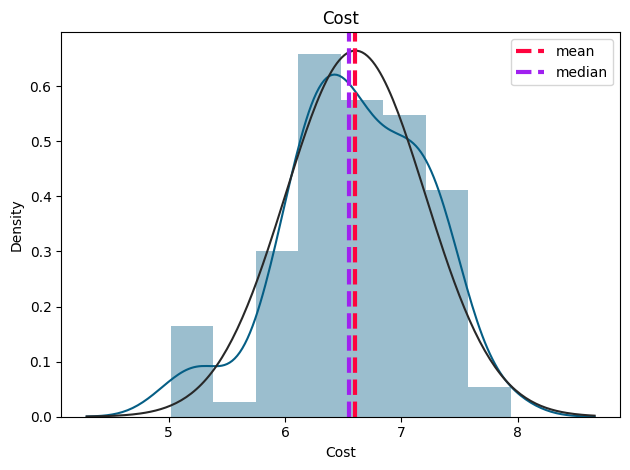

In [126]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_dummy[col], color = '#055E85', fit = norm);
    feature = cluster_dummy[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

I applied a log transformation to the "Cost" column to address its positive skewness.

### 6. Data Scaling

In [127]:
# Scaling your data
# Scaling your data
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

In this case, I applied the Standard Scaler, which is appropriate for data that exhibits a normal distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [128]:
scaled_df.head(1)

Restaurant      Cost  Average_Rating  Total_Cuisine_Count  American  \
0  Beyond Flavours  0.135688        1.341321             2.483145         0   

   Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  Salad  \
0       0        0      0    0       0  ...             1      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             1        0            0      0     0      0  

[1 rows x 48 columns]

In [129]:
# DImensionality Reduction (If needed)
#applying pca
from sklearn.decomposition import PCA
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()
# fit PCA on features
pca.fit(scaled_df[features])

PCA()

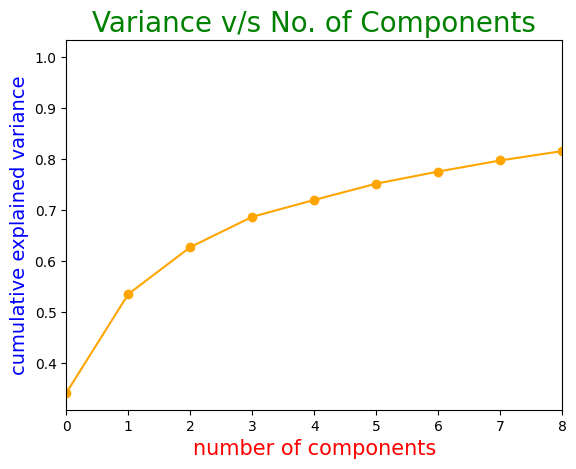

In [130]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [131]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34178683 0.1935377  0.09208907]
Cumulative variance explained by 3 principal components: 62.74%


In [132]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA (Principal Component Analysis) is a widely used dimensionality reduction method. In this particular case, PCA was employed to reduce the dimensionality to 3 based on the characteristics of the elbow curve.

### 8. Data Splitting

In [133]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = X_tfidf # I have created this during vectorization
y = sentiment_df['Sentiment']

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7963, 17327)
Number transactions y_train dataset:  (7963,)
Number transactions X_test dataset:  (1991, 17327)
Number transactions y_test dataset:  (1991,)


##### What data splitting ratio have you used and why?

Given the dataset's size of approximately 10,000 records, I decided to split the data into an 80:20 ratio for training and testing, respectively.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

We're utilizing the Class Imbalance Ratio (CIR) to quantify data imbalance. The CIR is computed as the ratio of observations in the majority class (Nm) to those in the minority class (Nm). Mathematically, CIR equals Nm divided by Ns, where Nm represents the number of observations in the majority class, and Ns represents the number of observations in the minority class.

In [135]:
sentiment_df.Sentiment.value_counts(normalize = True).mul(100).round(2)

Sentiment
1    62.97
0    37.03
Name: proportion, dtype: float64

In [136]:
# Handling Imbalanced Dataset (If needed)
#getting the value count for target class
sentiment_ratio_CIR = sentiment_df['Sentiment'].value_counts(normalize=True)[1] / sentiment_df['Sentiment'].value_counts(normalize=True)[0]

In [137]:
sentiment_ratio_CIR.round(4)

1.7005

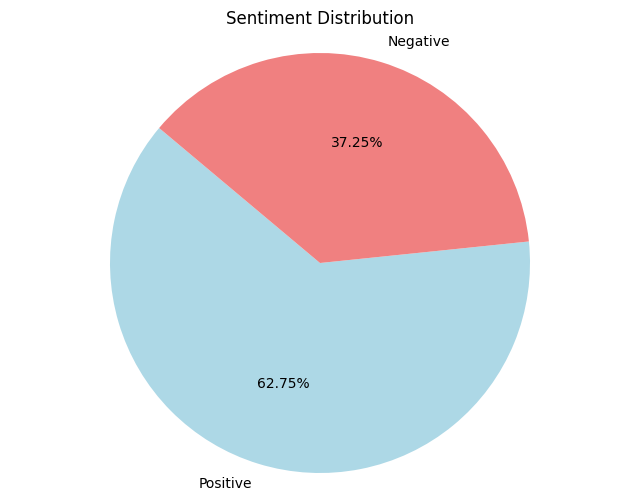

In [138]:
#Lets see pie plot of Overall Customer Sentiment
# Data
labels = ['Positive', 'Negative']
sizes = [62.37, 37.03]
colors = ['lightblue', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes, there is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance.

## ***7. ML Model Implementation***

### ML Model - 1

In [139]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

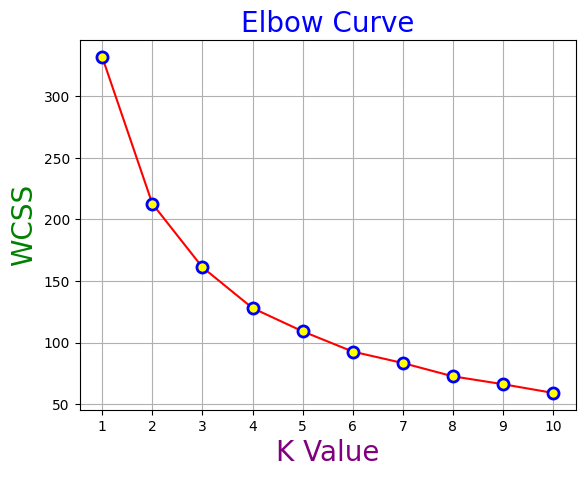

In [140]:
# Elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='red', markersize=8, markerfacecolor='yellow', markeredgewidth=2, markeredgecolor='blue')
plt.xlabel("K Value", size=20, color='purple')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS", size=20, color='green')
plt.title('Elbow Curve', size=20, color='blue')
plt.grid(True)
plt.show()


For n_clusters = 2 average silhouette_score is : 0.31300113786471134
For n_clusters = 3 average silhouette_score is : 0.2965776693769935
For n_clusters = 4 average silhouette_score is : 0.31131224693674725
For n_clusters = 5 average silhouette_score is : 0.30316064286939365
For n_clusters = 6 average silhouette_score is : 0.3119047373159745
For n_clusters = 7 average silhouette_score is : 0.3280153565606976
For n_clusters = 8 average silhouette_score is : 0.31038481030368886
For n_clusters = 9 average silhouette_score is : 0.3142205728794155


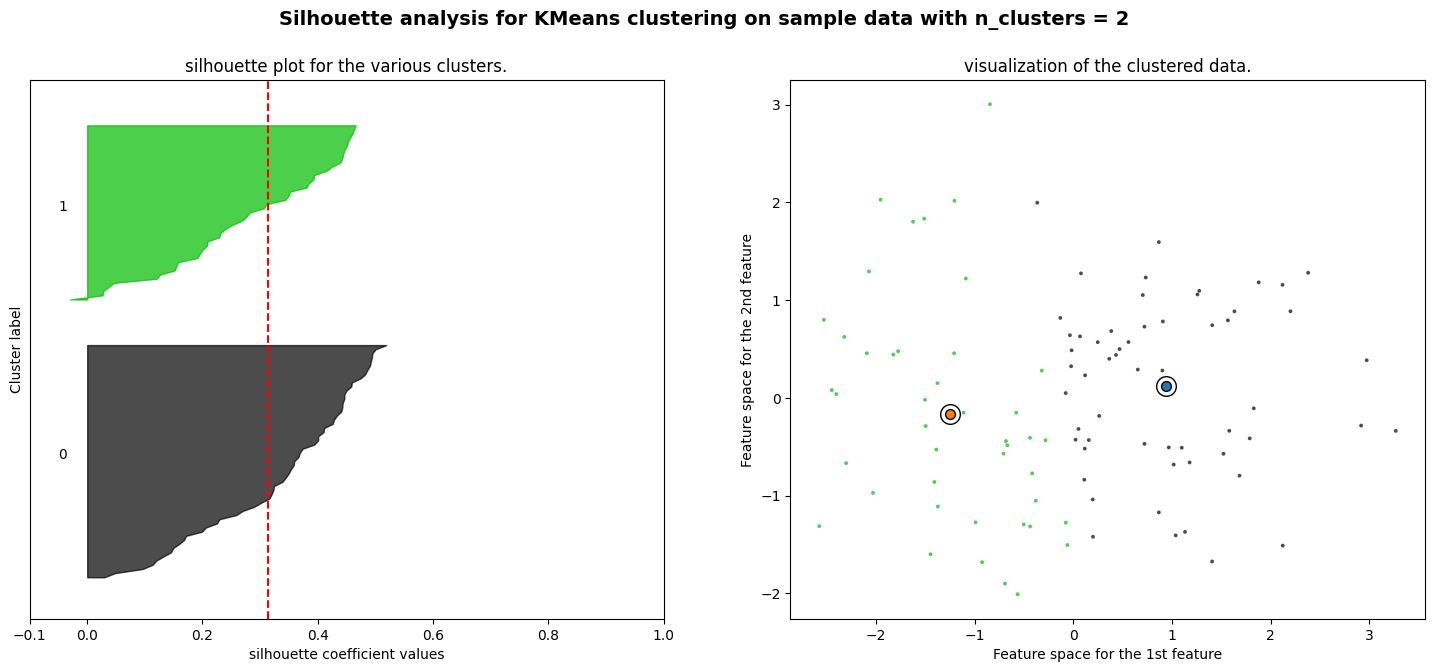

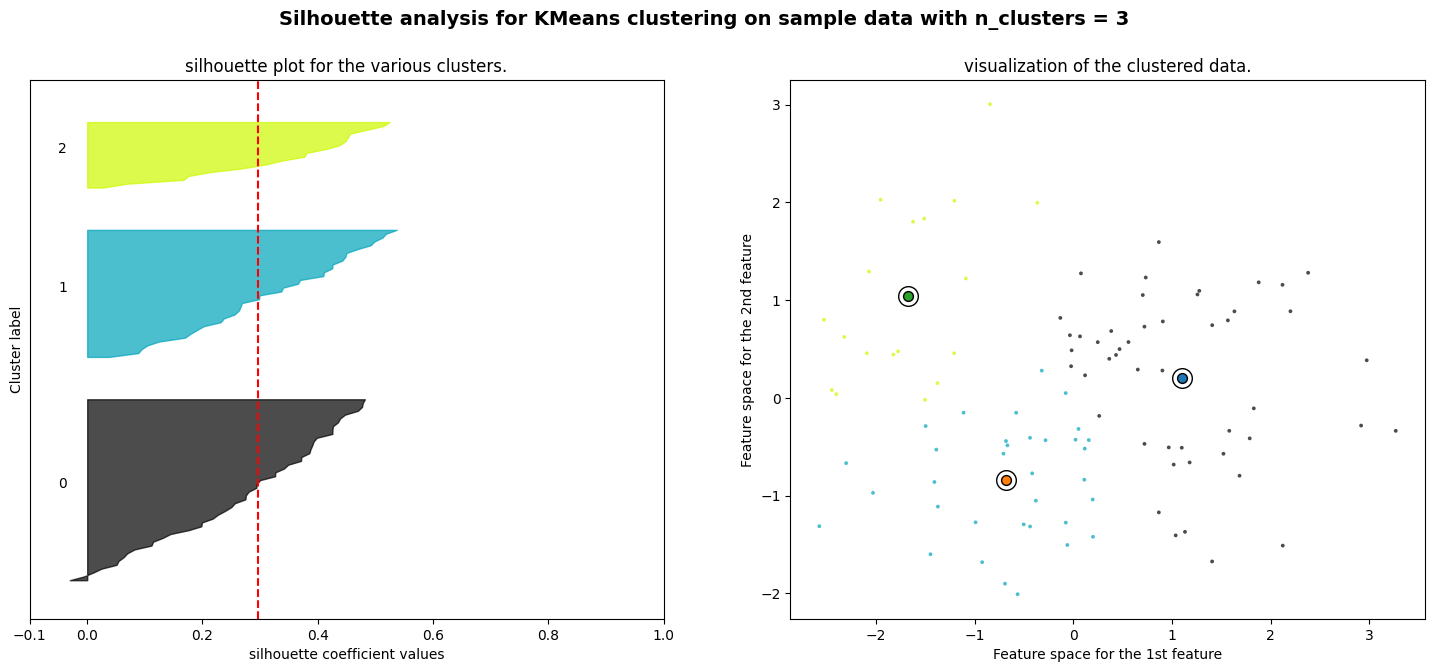

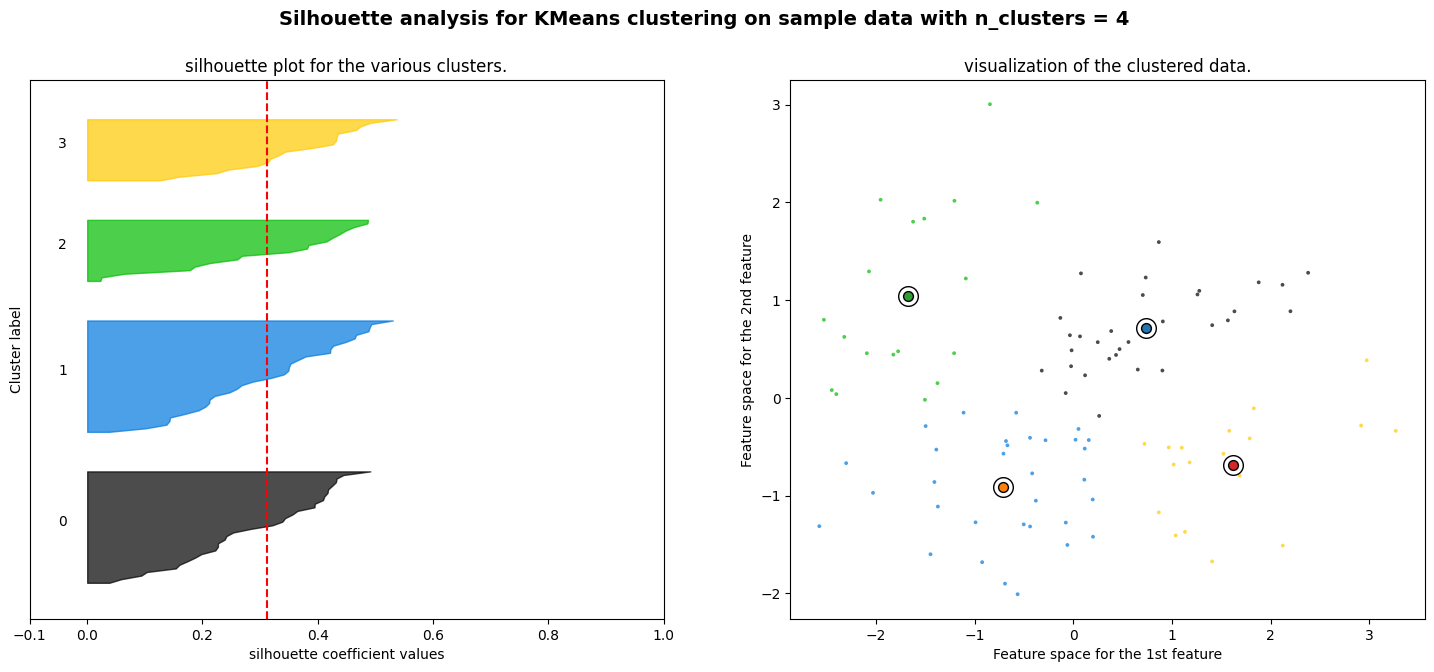

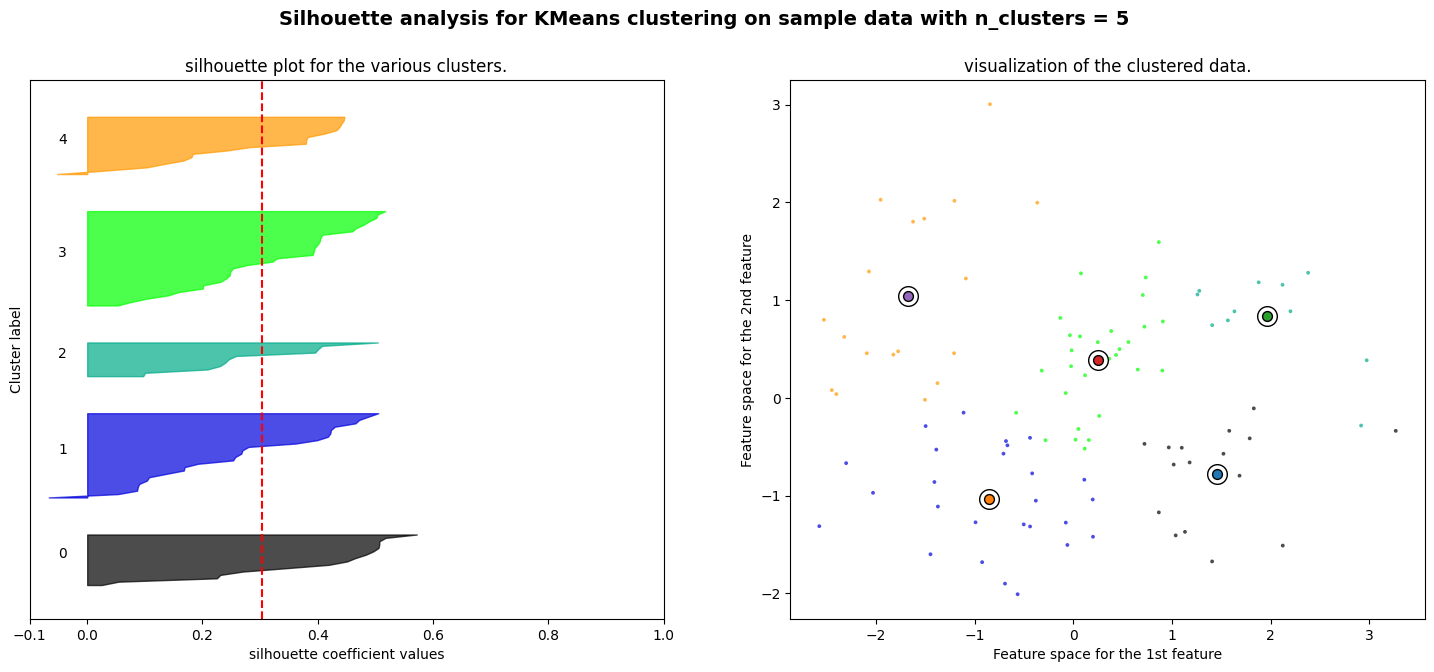

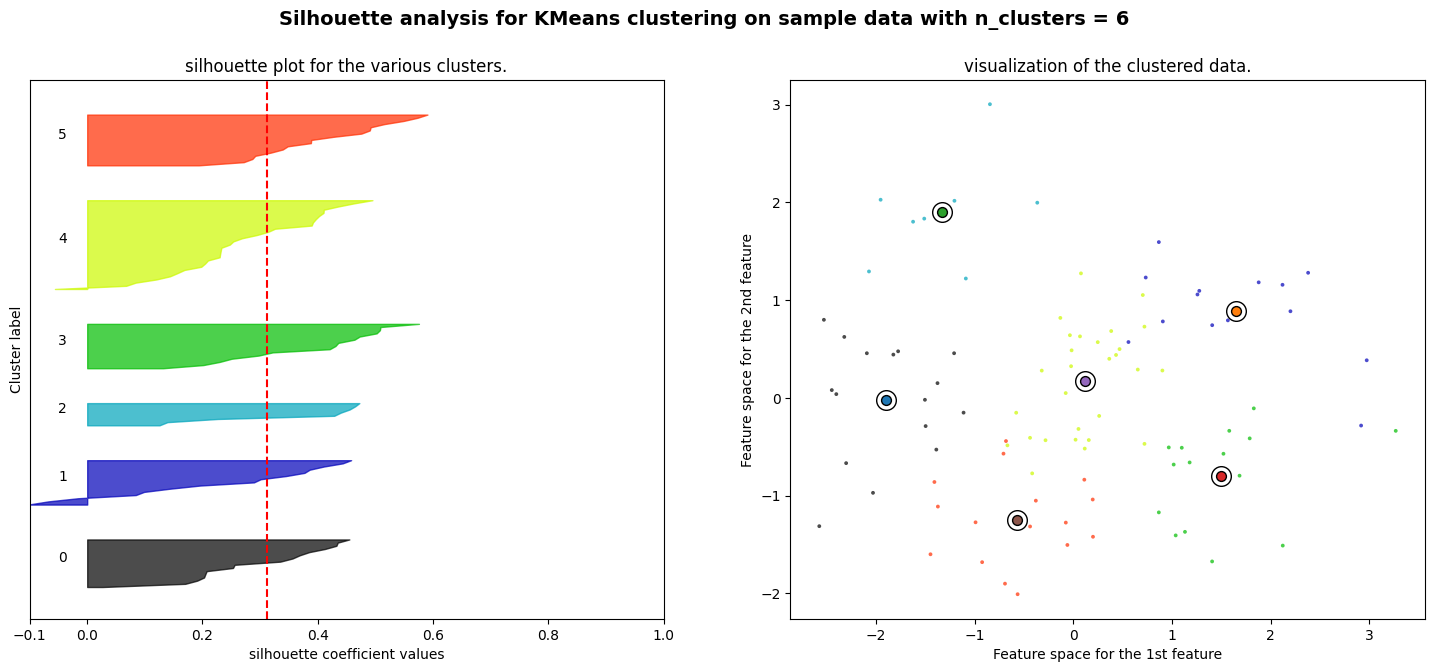

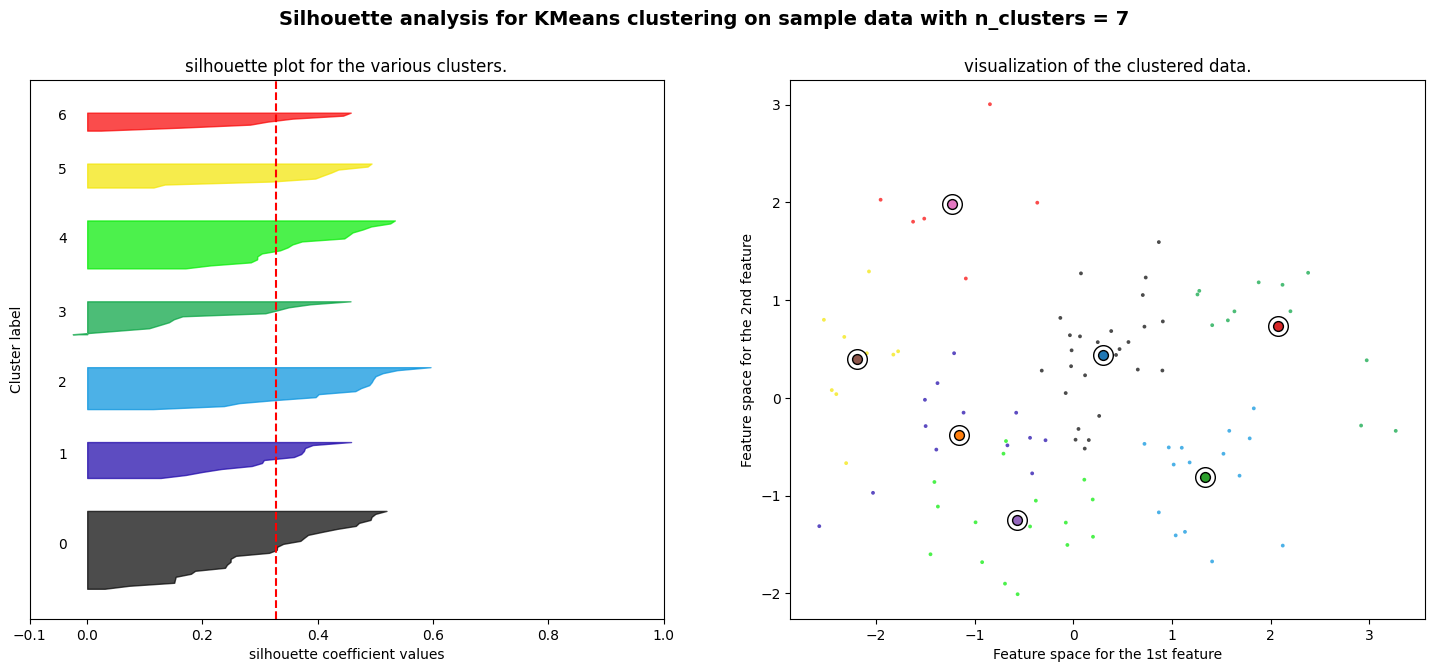

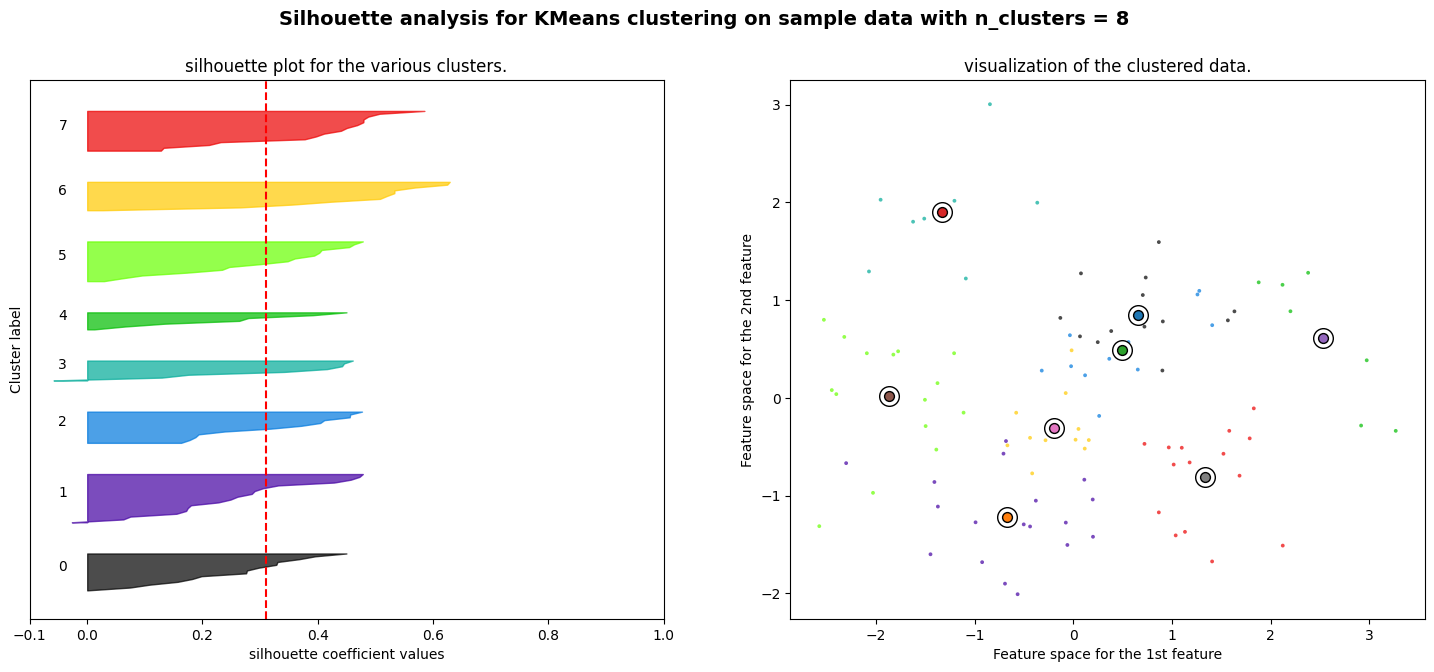

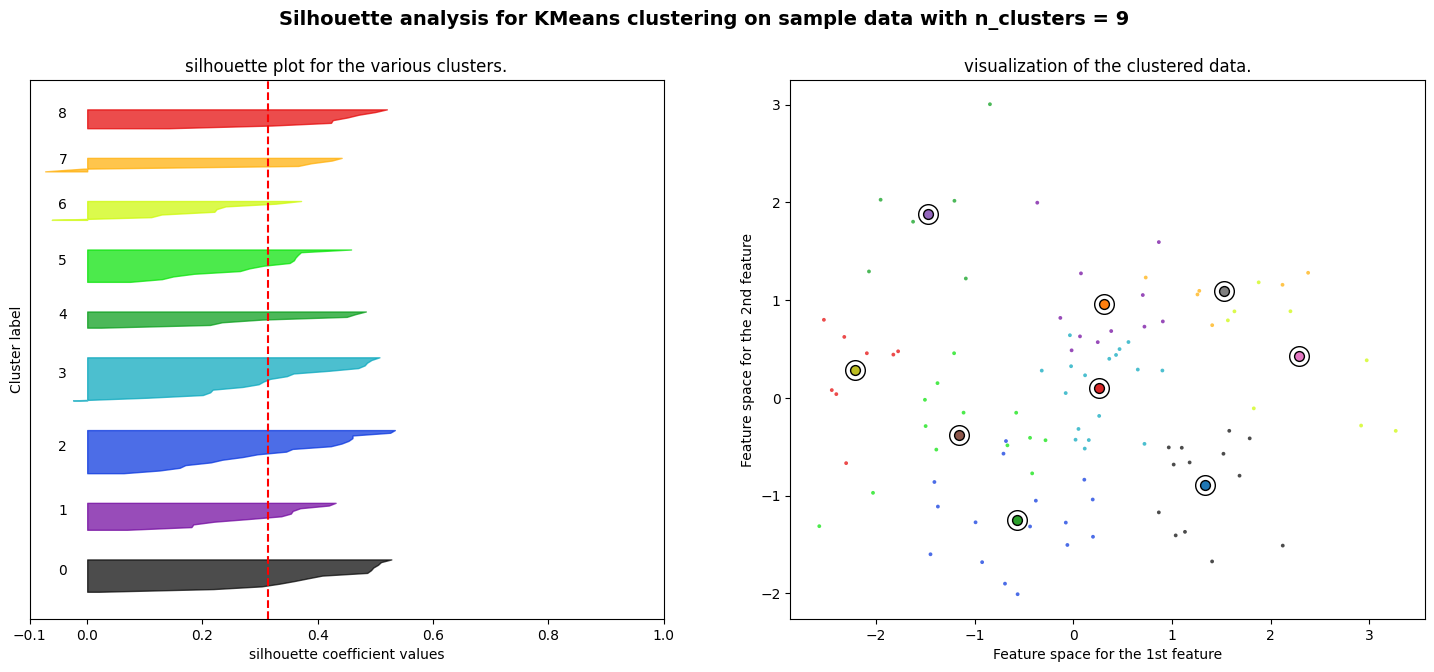

In [141]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='o', alpha=1, s=50, edgecolor='k')


    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

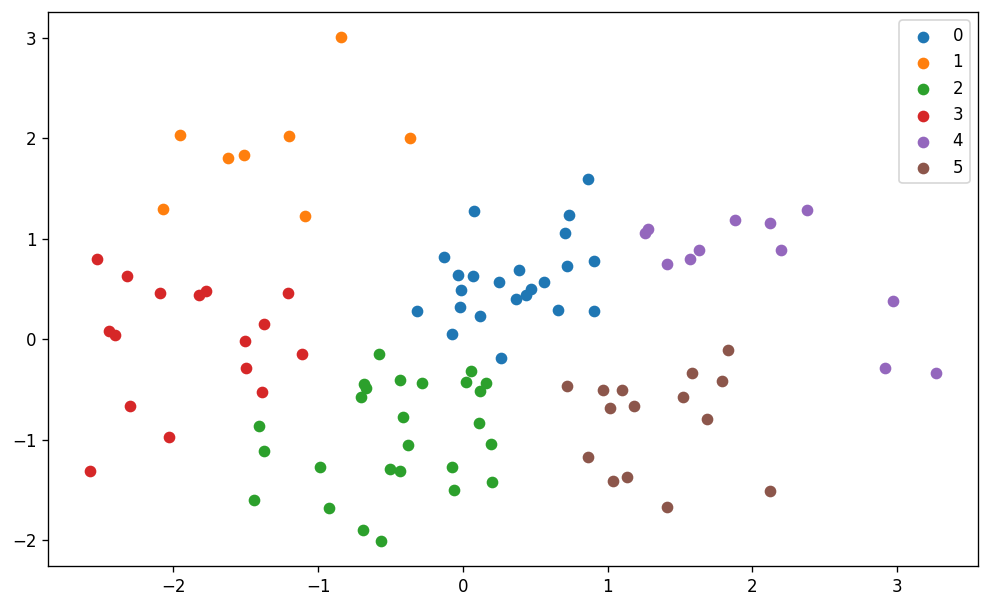

In [142]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()


In [143]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(df_pca)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Create a new column in the dataframe to store the cluster labels
scaled_df['Cluster'] = labels

# Print the cluster centers
print(kmeans.cluster_centers_)


[[-0.67742957 -0.84438318  0.04665157]
 [ 1.13361494  0.19551618  0.01359013]
 [-1.59196297  1.02735619 -0.11709944]]


In [144]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

PC1       PC2       PC3  label
Restaurant                                     
B-Dubs     -0.843701  3.003878 -0.632770      1
KFC         1.788597 -0.413857 -0.498047      5

In [145]:
# joining clusters
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  \
Restaurant                                                                
B-Dubs                    7.378384            4.81                    1   
Sardarji's Chaats & More  5.993961            3.25                    3   

                          American  Andhra  Arabian  Asian  BBQ  Bakery  \
Restaurant                                                                
B-Dubs                           1       0        0      0    0       0   
Sardarji's Chaats & More         0       0        0      0    0       0   

                          Beverages  ...  Pizza  Salad  Seafood  South Indian  \
Restaurant                           ...                                        
B-Dubs                            0  ...      0      0        0             0   
Sardarji's Chaats & More          0  ...      0      0        0             0   

                          Spanish  Street Food  Sushi  Thai  Wraps  label  
Restaurant                                                                 
B-Dubs                          0            0      0     0      0      1  
Sardarji's Chaats & More        0            1      0     0      0      5  

[2 rows x 48 columns]

In [146]:
# back to normal from log during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  \
Restaurant                                                      
Yum Yum Tree - The Arabian Food Court  1200.0            3.56   
GD's                                    500.0            3.96   

                                       Total_Cuisine_Count  American  Andhra  \
Restaurant                                                                     
Yum Yum Tree - The Arabian Food Court                    2         0       0   
GD's                                                     2         1       0   

                                       Arabian  Asian  BBQ  Bakery  Beverages  \
Restaurant                                                                      
Yum Yum Tree - The Arabian Food Court        0      0    0       0          0   
GD's                                         0      0    0       0          0   

                                       ...  Pizza  Salad  Seafood  \
Restaurant                             ...                          
Yum Yum Tree - The Arabian Food Court  ...      0      0        0   
GD's                                   ...      0      0        0   

                                       South Indian  Spanish  Street Food  \
Restaurant                                                                  
Yum Yum Tree - The Arabian Food Court             0        0            0   
GD's                                              0        0            0   

                                       Sushi  Thai  Wraps  label  
Restaurant                                                        
Yum Yum Tree - The Arabian Food Court      0     0      0      0  
GD's                                       0     0      0      0  

[2 rows x 48 columns]

In [147]:
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = meta_df[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label',]], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800.0            4.28   
1                     Biryani, North Indian, Chinese   800.0            4.70   
2       Asian, Mediterranean, North Indian, Desserts  1300.0            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0            3.21   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0            4.34   

   Total_Cuisine_Count  label  
0                    6      3  
1                    3      1  
2                    4      1  
3                    5      2  
4                    5      3

In [148]:
# counting cluster observations
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

Total_Restaurant  count
1                 0     23
5                 1      8
0                 2     26
2                 3     16
4                 4     12
3                 5     15

In [149]:
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  Average_Rating  \
85               Momos Delight         Momos   200.0           3.725   
63                Dine O China         Momos   850.0           3.370   
41              Karachi Bakery      Desserts   500.0           3.800   
4   Over The Moon Brew Company  North Indian  1200.0           4.340   
69              The Indi Grill           BBQ  1500.0           4.600   

    Total_Cuisine_Count  label  
85                    1      4  
63                    3      2  
41                    3      0  
4                     5      3  
69                    3      1

In [150]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 3 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Seafood' 'Goan' 'BBQ' 'Japanese' 'Italian'
 'Salad' 'Sushi' 'Spanish' 'Modern Indian'] 

Cuisine List for Cluster : 1 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental' 'Sushi'] 

Cuisine List for Cluster : 2 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'American' 'Kebab' 'Italian' 'Finger Food'
 'Mexican' 'Salad' 'Andhra' 'Bakery' 'Mughlai' 'Juices' 'Arabian'
 'Hyderabadi' 'Thai' 'Indonesian' 'Asian' 'Momos' 'Sushi' 'Desserts'
 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 4 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 5 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mu

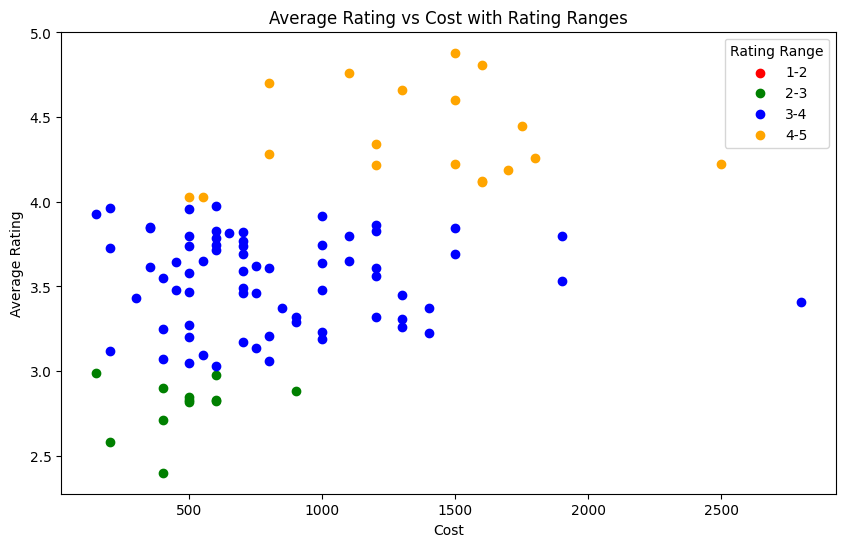

In [151]:
import matplotlib.pyplot as plt

# Define rating ranges and corresponding colors
rating_ranges = [(1, 2), (2, 3), (3, 4), (4, 5)]
colors = ['red', 'green', 'blue', 'orange']
labels = [f'{start}-{end}' for start, end in rating_ranges]

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot points with different colors based on rating range
for i, (start, end) in enumerate(rating_ranges):
    subset = clustering_result[(clustering_result['Average_Rating'] >= start) & (clustering_result['Average_Rating'] < end)]
    ax.scatter(subset['Cost'], subset['Average_Rating'], color=colors[i], label=labels[i])

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Average Rating')
plt.title('Average Rating vs Cost with Rating Ranges')
plt.legend(title='Rating Range')

# Show plot
plt.show()


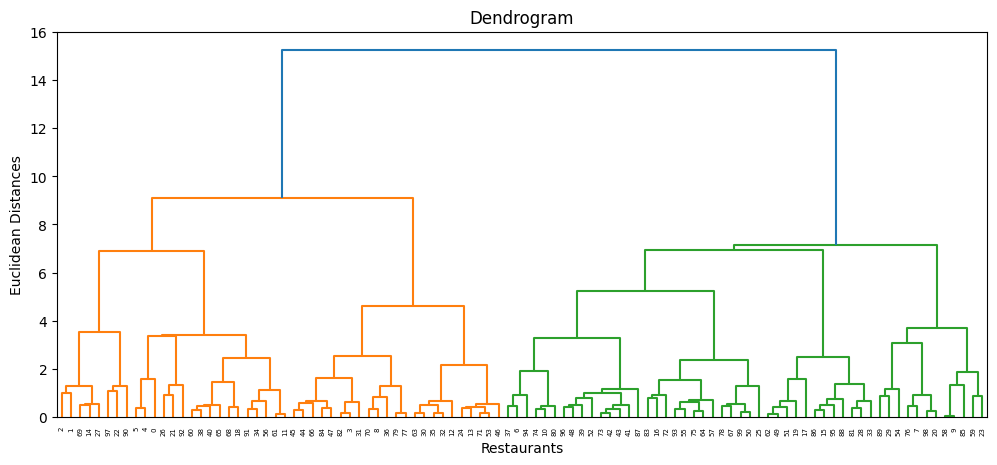

In [152]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [153]:
# Visualizing evaluation Metric Score chart

In [154]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation
topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))

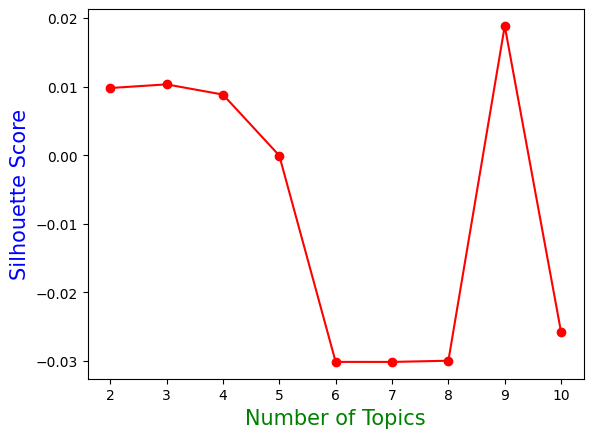

In [155]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [156]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [157]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.7 MB/s eta 0:00:00


In [158]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook(local=True)

In [159]:
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:,None]
doc_lengths = X_tfidf.sum(axis=1).getA1()
term_frequency = X_tfidf.sum(axis=0).getA1()
lda_doc_topic_dists = lda.transform(X)
doc_topic_dists = lda_doc_topic_dists / lda_doc_topic_dists.sum(axis=1)[:,None]
vocab = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
# ploting the clusters top 30 terms
# lda_pyLDAvis = pyLDAvis.prepare(lda, X, vectorizer)
a = pyLDAvis.prepare(topic_term_dists,doc_topic_dists,doc_lengths,vocab,term_frequency)
pyLDAvis.display(a)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
review_sentiment_prediction = review_df[review_df.columns.to_list()].copy()
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Restaurant             Reviewer  \
4986                          Mathura Vilas           Ruby Ganta   
9867                               Triptify                Vamsi   
6248  Shree Santosh Dhaba Family Restaurant     Yera Navin Kumar   
6215  Shree Santosh Dhaba Family Restaurant  Harsh Raj Choudhary   
3659    Banana Leaf Multicuisine Restaurant   Lux Vijay Aravindh   

                                                 Review  Rating  \
4986  I'm a pure non vegetarian, but this place beca...     5.0   
9867                                 very fast delivery     5.0   
6248    paneer too spicy. manchurian an naan were great     3.0   
6215                                  very poor quality     1.0   
3659                                          good food     5.0   

                      Metadata                Time  Pictures  \
4986   5 Reviews , 3 Followers 2018-10-12 18:38:00         0   
9867                  1 Review 2018-07-30 22:58:00         0   
6248  6 Reviews , 33 Followers 2018-07-28 06:14:00         0   
6215    5 Reviews , 1 Follower 2019-02-08 22:45:00         0   
3659  2 Reviews , 77 Followers 2018-07-22 20:27:00         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
4986                      5                 3.0         2018            10   
9867                      1                 0.0         2018             7   
6248                      6                33.0         2018             7   
6215                      5                 1.0         2019             2   
3659                      2                77.0         2018             7   

      Review_Hour  Month DayOfWeek  Hour  Prediction  
4986           18     10    Friday    18           2  
9867           22      7    Monday    22           3  
6248            6      7  Saturday     6           2  
6215           22      2    Friday    22           2  
3659           20      7    Sunday    20           0

🗒argmax(axis=1) returns the index of the topic that has the highest probability for each sample, it finds the topic that has the highest probability of describing each sample in the dataset

In [163]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] ==
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  2 

Rating
5.0    3105
4.0    2239
1.0    1562
3.0    1107
2.0     618
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64
Prediction =  0 

Rating
5.0    430
4.0     93
3.0     35
1.0     34
2.0     21
Name: count, dtype: int64
Prediction =  1 

Rating
1.0    113
5.0     60
2.0     36
3.0     28
4.0     27
Name: count, dtype: int64
Prediction =  3 

Rating
5.0    231
1.0     26
3.0     22
4.0     14
2.0      9
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA is an unsupervised learning algorithm, meaning it lacks predefined labels. Instead, it assigns labels based on the analysis of word weights and their context within each topic. Consequently, the predicted topic is not definitive. To enhance accuracy, experimentation with various techniques, such as employing supervised algorithms and amalgamating results, can be undertaken to refine sentiment labeling.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOP 100 WORDS FOR TOPIC #0


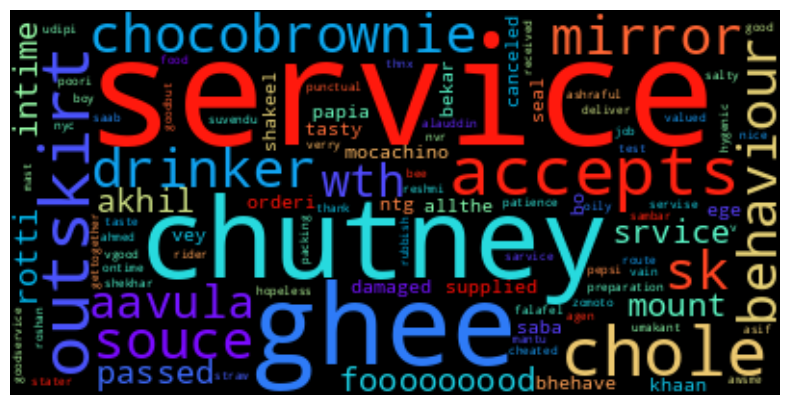

TOP 100 WORDS FOR TOPIC #1


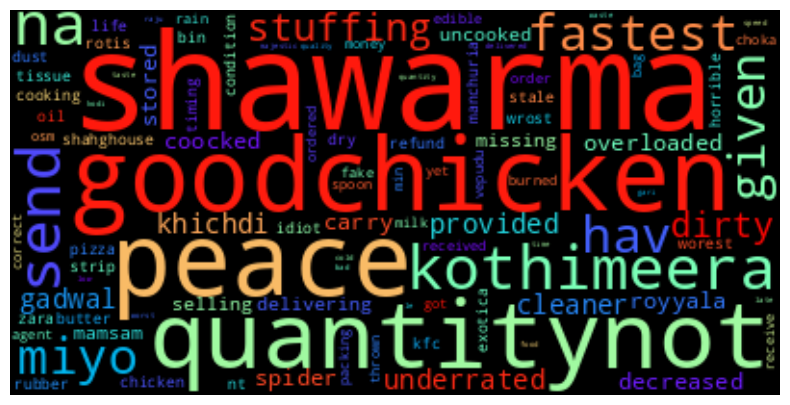

TOP 100 WORDS FOR TOPIC #2


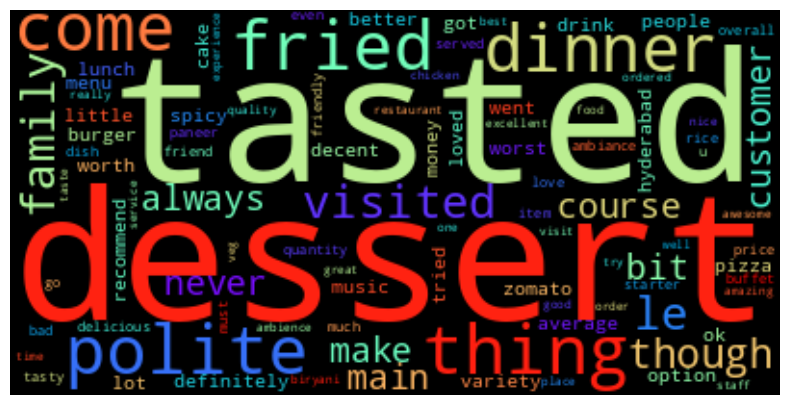

TOP 100 WORDS FOR TOPIC #3


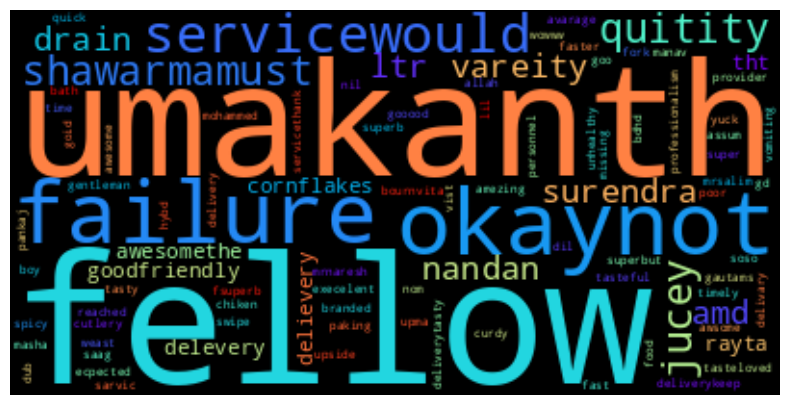

In [164]:
from wordcloud import WordCloud
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

#### 2. Cross- Validation & Hyperparameter Tuning

In [175]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Logistic Regression**

In [167]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**XgBoost**

In [168]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
# logitic regression GridSearchCV
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')
clf_grid.fit(X_train,y_train)
# XGBoost gridsearchCV
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


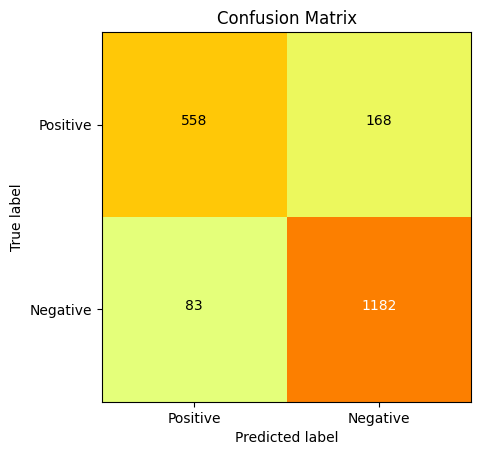

[[ 558  168]
 [  83 1182]]
Metric        Score
---------  --------
ROC AUC    0.851491
Precision  0.875556
Recall     0.934387
F1         0.904015
Accuracy   0.873933


In [177]:
#printing result
from sklearn.metrics import confusion_matrix
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).


*   558 instances are labeled as True Positive (correctly predicted as positive)
*   168 instances are labeled as False Positive (incorrectly predicted as positive)

*   1182 instances are labeled as True Negative (correctly predicted as negative)
*   83 instances are labeled as False Negative (incorrectly predicted as negative)





**XgBoost**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


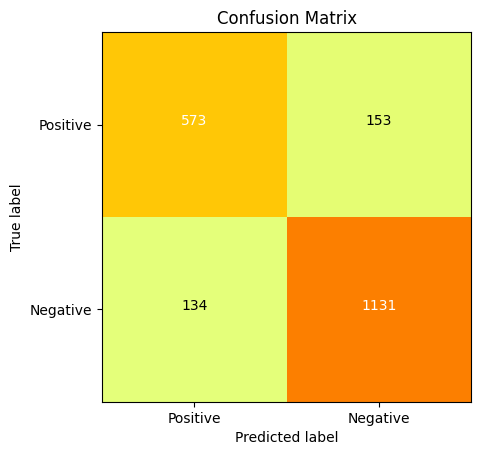

[[ 573  153]
 [ 134 1131]]
Metric        Score
---------  --------
ROC AUC    0.841664
Precision  0.880841
Recall     0.894071
F1         0.887407
Accuracy   0.855851


In [178]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).


*   573 instances are labeled as True Positive (correctly predicted as positive)

*   153 instances are labeled as False Positive (incorrectly predicted as positive)
*   1131 instances are labeled as True Negative (correctly predicted as negative)


*   134 instances are labeled as False Negative (incorrectly predicted as negative)


In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


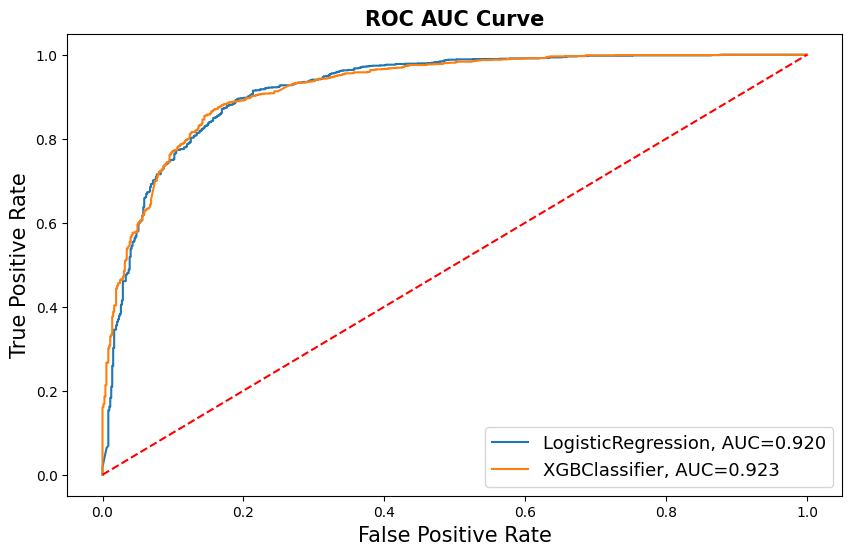

In [185]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table._append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**2. Cross- Validation & Hyperparameter Tuning**

**Which hyperparameter optimization technique have you used and why?**

I employed GridSearch, even though it can be time-consuming, because it's a powerful optimization technique that typically leads to the best outcomes.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

The method has produced highly favorable results, indicating its effectiveness.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The ROC AUC score quantifies the probability of accurately classifying new observations, making it of significant business importance.

### ML Model - 3 - Recommendation System

**Content-Based Filtering**

**Recommendation based on user profile and restaurant genre**

In [186]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Restaurant  American  Andhra  Arabian  Asian  BBQ  Bakery  Beverages  \
0  Beyond Flavours         0       0        0      0    0       0          0   
1         Paradise         0       0        0      0    0       0          0   

   Biryani  Burger  ...  North Indian  Pizza  Salad  Seafood  South Indian  \
0        0       0  ...             1      0      0        0             1   
1        1       0  ...             1      0      0        0             0   

   Spanish  Street Food  Sushi  Thai  Wraps  
0        0            0      0     0      0  
1        0            0      0     0      0  

[2 rows x 45 columns]

In [187]:
#shape
restaurant_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 45)

In [188]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [189]:
#matrix shape
rest_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 44)

In [190]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours     5.0
1  Anusha Tirumalaneedi  Beyond Flavours     5.0
2       Ashok Shekhawat  Beyond Flavours     5.0
3        Swapnil Sarkar  Beyond Flavours     5.0
4                Dileep  Beyond Flavours     5.0

In [191]:
#shape
user_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9954, 3)

In [192]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reviewer  \
0                    #FOODPORN   
1          #chloesviews // CAH   
2                         $ign   
3                     4mybanti   
4  @FuloriBinaChutneyKaiseBani   

                                    Rated_Restaurant  
0  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...  
1         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]  
2           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]  
3      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]  
4  [{'Restaurant': 'Chinese Pavilion', 'Rating': ...

In [193]:
#shape
user_rating.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7442, 2)

In [194]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))),
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
#getting output
user_preference_vector.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Restaurant        Reviewer  Beyond Flavours  Paradise  Flechazo  \
1353        Chandra Sekhar              0.0       0.0       0.0   
926          Ashish Bihani              0.0       0.0       0.0   
6600              Swarnali              0.0       0.0       0.0   
3506         Narendra Babu              0.0       0.0       0.0   
5065               Safa Iz              0.0       0.0       0.0   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
1353                                   0.0                         0.0   
926                                    0.0                         0.0   
6600                                   0.0                         0.0   
3506                                   0.0                         0.0   
5065                                   0.0                         0.0   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
1353                          0.0      0.0                       0.0   
926                           0.0      0.0                       0.0   
6600                          0.0      0.0                       0.0   
3506                          0.0      0.0                       0.0   
5065                          0.0      0.0                       0.0   

Restaurant  Hyper Local  ...  Arena Eleven  \
1353                0.0  ...           0.0   
926                 0.0  ...           0.0   
6600                0.0  ...           0.0   
3506                0.0  ...           0.0   
5065                0.0  ...           0.0   

Restaurant  Cascade - Radisson Hyderabad Hitec City  \
1353                                            0.0   
926                                             0.0   
6600                                            0.0   
3506                                            0.0   
5065                                            0.0   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
1353                                         0.0                       0.0   
926                                          0.0                       0.0   
6600                                         0.0                       0.0   
3506                                         0.0                       0.0   
5065                                         0.0                       0.0   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
1353                   0.0         0.0                0.0   
926                    0.0         0.0                0.0   
6600                   0.0         0.0                0.0   
3506                   0.0         0.0                0.0   
5065                   0.0         1.0                0.0   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion  
1353                                    0.0       0.0               0.0  
926                                     0.0       0.0               0.0  
6600                                    0.0       0.0               0.0  
3506                                    0.0       0.0               0.0  
5065                                    0.0       0.0               0.0  

[5 rows x 101 columns]

In [214]:
import pandas as pd
#using dot multiplication to find score or weight for each reviewer
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = pd.concat([result_df, pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']])], ignore_index=False)

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
#getting output
result_df[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reviewer American Andhra Arabian Asian  BBQ Bakery  \
0                    #FOODPORN      0.0    0.0     0.0   5.0  0.0    0.0   
1          #chloesviews // CAH      0.0    0.0     0.0   0.0  0.0    0.0   
2                         $ign      0.0    0.0     0.0   0.0  0.0    0.0   
3                     4mybanti      0.0    2.0     0.0   0.0  0.0    0.0   
4  @FuloriBinaChutneyKaiseBani      0.0    0.0     0.0   0.0  0.0    0.0   

  Beverages Biryani Burger  ... North Indian Pizza Salad Seafood South Indian  \
0       0.0     0.0    0.0  ...          0.0   0.0   0.0     0.0          0.0   
1       0.0     0.0    0.0  ...          5.0   0.0   0.0     0.0          5.0   
2       0.0     0.0    0.0  ...          4.0   0.0   0.0     0.0          0.0   
3       0.0     0.0    0.0  ...          2.0   0.0   0.0     0.0          0.0   
4       0.0     0.0    0.0  ...          0.0   0.0   0.0     5.0          0.0   

  Spanish Street Food Sushi Thai Wraps  
0     0.0         0.0   5.0  0.0   0.0  
1     0.0         0.0   0.0  0.0   0.0  
2     0.0         0.0   0.0  0.0   0.0  
3     0.0         0.0   0.0  0.0   0.0  
4     0.0         0.0   0.0  0.0   0.0  

[5 rows x 45 columns]

In [217]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reviewer                                   Rated_Restaurant  \
654         Ankita  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
3855   Parijat Ray  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
2652         Kiran  [{'Restaurant': 'Shah Ghouse Hotel & Restauran...   
7009  Vedant Killa  [{'Restaurant': 'Barbeque Nation', 'Rating': 5...   
2311     Jay Mehta  [{'Restaurant': 'NorFest - The Dhaba', 'Rating...   

      Rated_Restaurant_Count  
654                       13  
3855                      13  
2652                      12  
7009                      11  
2311                      11

In [218]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages Biryani  \
654   Ankita     12.0   12.0     0.0   0.0  0.0    4.0       0.0     8.0   

    Burger  ... North Indian Pizza Salad Seafood South Indian Spanish  \
654    0.0  ...         36.0   0.0   4.0     0.0         13.0     0.0   

    Street Food Sushi Thai Wraps  
654         0.0   4.0  0.0   4.0  

[1 rows x 45 columns]

In [221]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [222]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [223]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [226]:
# Visualizing evaluation Metric Score chart
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


70.0

In [227]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [228]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values


        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values

        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])

    return users, restaurant, scores


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User                               Restaurant  Score
0               Ankita                          Beyond Flavours   91.0
1               Ankita                                 Paradise   70.0
2               Ankita                                 Flechazo   44.0
3               Ankita           Shah Ghouse Hotel & Restaurant   70.0
4               Ankita               Over The Moon Brew Company   74.0
...                ...                                      ...    ...
28081  Khaleel Khurram                                  T Grill   15.0
28082  Khaleel Khurram  Cascade - Radisson Hyderabad Hitec City   35.0
28083  Khaleel Khurram     Collage - Hyatt Hyderabad Gachibowli   40.0
28084  Khaleel Khurram                               Desi Bytes   15.0
28085  Khaleel Khurram          Zega - Sheraton Hyderabad Hotel   10.0

[28086 rows x 3 columns]

In [231]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Restaurant  User
19  Collage - Hyatt Hyderabad Gachibowli   683
13                       Beyond Flavours   665
57            Over The Moon Brew Company   664
63                            PourHouse7   655
56                          Olive Garden   629

In [232]:
#least recommended restaurant
recom_rest[-5:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Restaurant  User
84       Zing's Northeast Kitchen    10
9                          B-Dubs     6
52            Mohammedia Shawarma     3
78  The Old Madras Baking Company     2
53                  Momos Delight     1

In [233]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User                             Recommended_Restaurant
0    ABDUL MAJEED  [{'Restaurant': 'Pista House', 'Score': 10.0},...
1              AJ  [{'Restaurant': 'Flechazo', 'Score': 17.0}, {'...
2          ASH&B2  [{'Restaurant': 'Beyond Flavours', 'Score': 18...
3     Aamir Nawaz  [{'Restaurant': 'Beyond Flavours', 'Score': 11...
4  Aanchal Khemka  [{'Restaurant': 'Beyond Flavours', 'Score': 18...

In [234]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User                             Recommended_Restaurant  \
77        Anusha Sinha  [{'Restaurant': 'Beyond Flavours', 'Score': 50...   
455              Nillu  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
335              Kiran  [{'Restaurant': 'Beyond Flavours', 'Score': 42...   
709         Siva Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 46...   
49        Aman Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 35...   
69              Ankita  [{'Restaurant': 'Beyond Flavours', 'Score': 91...   
738            Sravani  [{'Restaurant': 'Beyond Flavours', 'Score': 57...   
437      Namit Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 25...   
494  Prachita Jayaswal  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
513      Praveen Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 45...   

     Total_Recommendation  
77                     72  
455                    71  
335                    71  
709                    69  
49                     69  
69                     69  
738                    68  
437                    68  
494                    67  
513                    67

In [235]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Restaurant  Score
0                        Beyond Flavours   91.0
31                           Owm Nom Nom   82.0
56                          Olive Garden   82.0
64  Collage - Hyatt Hyderabad Gachibowli   82.0
40                            PourHouse7   82.0
..                                   ...    ...
60                                  GD's   12.0
51                               Labonel   12.0
65                        Dunkin' Donuts   12.0
29                          Karachi Cafe   12.0
16                            Tiki Shack   12.0

[69 rows x 2 columns]

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Recommendation based on Restaurant Similarity on Reviews**

⚡ Calculating similarity based recommendations using reviews can be a valid approach, but it is important to ensure that the reviews used are reliable and unbiased, and that the similarity calculation algorithm is appropriate for the task.

Reviews can provide valuable information about the characteristics and quality of products or services, and this information can be used to identify similar items.

In [236]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


doc_index                            doc_id      token  bow
88700        3805                   The Glass Onion   bringing    1
130590       5609  Feast - Sheraton Hyderabad Hotel       went    1
93693        3965                     Deli 9 Bistro        hot    1
79502        3351                        Club Rogue  difficult    1
61393        2636            Mustang Terrace Lounge      pizza    1

In [237]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


doc_id     token  bow
0  Beyond Flavours      also    1
1  Beyond Flavours  ambience    1
2  Beyond Flavours    brunch    1
3  Beyond Flavours     chill    1
4  Beyond Flavours      cost    1

In [238]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Restaurant  \
7668            The Old Madras Baking Company   
9108  Cascade - Radisson Hyderabad Hitec City   
896                               Hyper Local   
5593                               Cafe Eclat   
5000                            Gal Punjab Di   

                                                 Review  
7668  [gone, old, madras, baking, company, past, buy...  
9108  [happy, lunch, buffet, found, plenty, option, ...  
896   [best, place, party, pro, tastey, food, pizza,...  
5593  [spread, looked, amazing, walked, promise, fre...  
5000  [food, taste, goodwe, hara, bara, kabaab, aach...

In [240]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Hyper Local']
rest_bow[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


doc_id    token  bow
18433  Hyper Local    chill    1
18434  Hyper Local     cost    1
18435  Hyper Local     food    1
18436  Hyper Local      one    1
18437  Hyper Local    place    4
18438  Hyper Local   really    1
18439  Hyper Local  amazing    2
18440  Hyper Local   served    1
18441  Hyper Local     menu    1
18442  Hyper Local    tried    1

In [241]:
#converting bow to horizontal format using pivot
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'],
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


doc_id  bow                                                        \
token              able aboutthat absolutely ac accepted achaari achar achari   
0      Hyper Local    1         1          2  1        2       1     1      1   

              ...                                    
token across  ... 👌🙌🏻  😂  😋 😋😋😋  😍 😎😉🙂  😒  😜 🙃😜🤪 🙏🏽  
0          1  ...   1  1  1   1  1   1  1  1   1  1  

[1 rows x 1514 columns]

In [258]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = pd.concat([base, compare])
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [260]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


doc_id     type  absent  absolutely  accessible  across  action  \
0     Asian Meal Box     base     1.0         3.0         0.0     1.0     1.0   
1  Biryanis And More  compare     0.0         3.0         1.0     1.0     0.0   

   actual  actually  add  ...   👌🏻   👍🏻  😀😀😀😀😀😀😀😀    😂  😂the    😃    😍   😍😍  \
0     0.0       1.0  1.0  ...  0.0  0.0       0.0  0.0   0.0  1.0  0.0  0.0   
1     1.0       1.0  1.0  ...  1.0  1.0       1.0  1.0   1.0  0.0  4.0  1.0   

     😕  😪😪😪😪  
0  0.0   0.0  
1  1.0   1.0  

[2 rows x 1334 columns]

In [261]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5338412612763059

In [262]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Beyond Flavours  Paradise  Flechazo  \
Beyond Flavours                               1  0.815282  0.837709   
Paradise                               0.815282         1  0.753922   
Flechazo                               0.837709  0.753922         1   
Shah Ghouse Hotel & Restaurant         0.611007  0.653827  0.518722   
Over The Moon Brew Company             0.815769  0.707631  0.785025   
...                                         ...       ...       ...   
Desi Bytes                             0.682632  0.639877  0.585934   
Hyderabadi Daawat                      0.683941  0.626877  0.620363   
Zega - Sheraton Hyderabad Hotel        0.819495  0.674288  0.782628   
Triptify                               0.529963  0.464338  0.442458   
Chinese Pavilion                       0.731976  0.628172   0.66733   

                                Shah Ghouse Hotel & Restaurant  \
Beyond Flavours                                       0.611007   
Paradise                                              0.653827   
Flechazo                                              0.518722   
Shah Ghouse Hotel & Restaurant                               1   
Over The Moon Brew Company                            0.539835   
...                                                        ...   
Desi Bytes                                            0.595847   
Hyderabadi Daawat                                     0.750261   
Zega - Sheraton Hyderabad Hotel                       0.581079   
Triptify                                              0.481501   
Chinese Pavilion                                      0.589365   

                                Over The Moon Brew Company  \
Beyond Flavours                                   0.815769   
Paradise                                          0.707631   
Flechazo                                          0.785025   
Shah Ghouse Hotel & Restaurant                    0.539835   
Over The Moon Brew Company                               1   
...                                                    ...   
Desi Bytes                                        0.609669   
Hyderabadi Daawat                                 0.620837   
Zega - Sheraton Hyderabad Hotel                    0.83488   
Triptify                                          0.469055   
Chinese Pavilion                                   0.67573   

                                The Fisherman's Wharf   eat.fit  \
Beyond Flavours                              0.818955  0.649446   
Paradise                                     0.647694  0.549879   
Flechazo                                     0.775124  0.512861   
Shah Ghouse Hotel & Restaurant               0.581056  0.649653   
Over The Moon Brew Company                   0.819997  0.528944   
...                                               ...       ...   
Desi Bytes                                   0.630524  0.670665   
Hyderabadi Daawat                            0.685905  0.639592   
Zega - Sheraton Hyderabad Hotel              0.857519  0.591932   
Triptify                                     0.491711  0.605769   
Chinese Pavilion                             0.737102  0.629921   

                                Shah Ghouse Spl Shawarma Hyper Local  \
Beyond Flavours                                  0.39839    0.829847   
Paradise                                        0.383607    0.705852   
Flechazo                                        0.368724     0.77205   
Shah Ghouse Hotel & Restaurant                  0.534582    0.605466   
Over The Moon Brew Company                      0.418801    0.816065   
...                                                  ...         ...   
Desi Bytes                                      0.441239    0.665187   
Hyderabadi Daawat                               0.475081    0.691564   
Zega - Sheraton Hyderabad Hotel                 0.423505    0.816463   
Triptify                                        0.401927    0.529188   
Chinese Pavilion                            

In [264]:
#creating function for mapping
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [265]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6043971333550248

These two restaurant are quite similar to each other in respect to reviews i.e., showing 60% similarity.

In [268]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]

                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim

    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [270]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
#getting the output
res_sim_df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


USER                      RESTAURANT     SCORE
4514   Gautam Narang       Hitech Bawarchi Food Zone  0.819957
45550   Mahesh Smart           The Tilt Bar Republic  0.798520
66522      Sneha Das  Shah Ghouse Hotel & Restaurant  0.705194
32090  Rajat Goel ✳️           The Fisherman's Wharf  0.802556
33581    Bhaskar Roy                       KS Bakers  0.668850
54250          Siddu             American Wild Wings  0.719522
47776      Eben Paul                        Delhi-39  0.815914
23003    Ram Chandra       Hitech Bawarchi Food Zone  0.811705
72630    Raashi Jain          Mustang Terrace Lounge  0.781962
35383         Charan                    Dine O China  0.769520

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Content-based filtering recommends items to users based on the attributes of the items and the user's past preferences. It creates a user profile with information about their preferences, such as restaurant genres or book types. Then, it compares item attributes to the user's profile to recommend similar items.

For instance, in a restaurant recommendation system, if a user likes Chinese, Italian, or Indian cuisine, the system suggests other restaurants offering these cuisines.

Content-based filtering can also recommend items to new users by analyzing item attributes. It can complement other techniques like collaborative filtering for more accurate recommendations.

Various machine learning models are used in content-based filtering, including:

- Cosine Similarity: Measures similarity between item vectors, ranging from -1 (completely dissimilar) to 1 (identical).
- Nearest Neighbors: Finds k-nearest items to a given item based on their attributes.
- Vector Space Model: Represents items as vectors in a multi-dimensional space, calculating similarity based on vector distance.

These models analyze item attributes to recommend relevant items to users.

### **1. Which Evaluation metrics did you consider for a positive business impact and why?**

In sentiment analysis, evaluation metrics include precision, recall, F1-score, and accuracy.

Precision assesses the ratio of true positive predictions to all positive predictions. It's useful when false positives are costly.
Recall (or sensitivity) gauges the ratio of true positive predictions to all actual positive instances. It's valuable when false negatives are costly.
F1-score, the harmonic mean of precision and recall, offers an overall measure of classifier performance.
Accuracy reflects the proportion of correctly classified instances among all instances.
The choice of evaluation metric depends on the specific context and the relative costs of false positives and false negatives. For a positive business impact, F1-score provides a balanced measure by considering both precision and recall.

# **2. Which ML model did you choose from the above created models as your final prediction model and why?**

I've opted for the XGBoost model, which has been fine-tuned for hyperparameters.

XGBoost is heavily regularized, curbing overfitting and enhancing robustness against unseen data. Being a supervised learning algorithm, XGBoost learns from labeled data to predict sentiment labels.

Its ensemble approach can enhance sentiment analysis by amalgamating predictions from multiple models.

XGBoost's regularization not only prevents overfitting but also enhances its adaptability to new data, a crucial aspect in sentiment analysis requiring generalization.

Given its speed and efficiency, XGBoost proves advantageous in sentiment analysis tasks, especially with large datasets necessitating swift predictions.

Its built-in feature selection mechanism aids in automatically identifying crucial features, vital in high-dimensional sentiment analysis datasets.

The gradient-boosted decision trees algorithm inherent in XGBoost excels in capturing intricate relationships between features and sentiment labels.

In sum, XGBoost's ensemble nature, regularization, speed, feature selection, and gradient-boosted decision tree algorithm render it a potent tool for sentiment analysis.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# import joblib

# Save the model to a file
# joblib.dump(model, 'model.joblib')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the model from the file
# model = joblib.load('model.joblib')

# Use the model to make predictions
# predictions = model.predict(data)

In [ ]:
#@title Flask code
# from flask import Flask, request, jsonify
# import pickle

# app = Flask(__name__)

# # Load the pre-trained model
# model = pickle.load(open('sentiment_model.pkl', 'rb'))

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the text from the request
#     text = request.json['text']

#     # Use the model to predict the sentiment
#     prediction = model.predict([text])[0]

#     # Return the prediction as a JSON response
#     return jsonify({'sentiment': prediction})

# if __name__ == '__main__':
#     app.run(debug=True)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we successfully applied various data preprocessing techniques to enhance the quality of our textual dataset, making it suitable for machine learning.

**Optimized Clustering:** Utilizing K-means clustering, we refined the number of clusters (K) and notably enhanced the Silhouette Score, signaling improved cluster distinction, with K=6 identified as the optimal value.

**Topic Modeling:** Employing Latent Dirichlet Allocation (LDA), we uncovered key topics within reviews, offering valuable insights into prevalent themes.

**Model Performance:** After hyperparameter tuning, supervised models like Logistic Regression and XGBoost demonstrated significant enhancements in key evaluation metrics.

**Improved Precision:** Achieving high precision is crucial for accurate positive sentiment prediction in sentiment analysis tasks, benefiting businesses in interpreting customer sentiment effectively.

**Enhanced Recall:** Demonstrating high recall ensures effective capture of positive instances, a critical feature in applications where missing positive cases is undesirable.

**Balanced F1-Score:** Attaining a balanced F1-score strikes a favorable balance between precision and recall, crucial for applications requiring both accuracy and coverage.

**Significance of ROC AUC:** The improved ROC AUC score post-tuning underscores the model's capacity to differentiate between positive and negative instances, vital for classification accuracy.

**Model Deployment:** Highlighting the importance of saving the best-performing model in a deployable format, paving the way for real-world implementation.

**Future Prospects:** Addressing the potential for live server deployment and stressing the importance of evaluating the model on unseen data for real-world validation.

**Impact on Business:** Emphasizing our project's potential to equip businesses with data-driven insights, enriching decision-making capabilities.

**Data Transformation:** From text preprocessing to model selection, our project showcases the transformative prowess of data science, converting raw data into actionable knowledge.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***